In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [154]:
data=1000
batch=10
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.003
c_reg2=0.0001

<tf.Variable 'Shape/Variable:0' shape=(10,) dtype=float64, numpy=
array([ 0.63679755,  2.11153344,  0.28826085,  1.56147312,  1.65130453,
        2.12189445,  3.14004691,  3.27871834,  5.35846823, 10.01140229])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


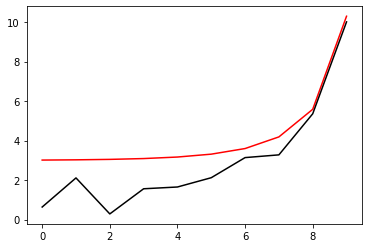

In [155]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [156]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

<tf.Variable 'Shape/Variable:0' shape=() dtype=float64, numpy=-1.1558584836520105>


In [133]:
def F_func(m, a,b):
    return 2*b/n_fin-m*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [144]:
def LP2(hh, m, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, phi1, pi1)
        for i in range (batch*100):
            if len(Positive)>=batch: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, phi1, pi1)
        for i in range (batch*3):
            if len(Negative)>=batch: break
            if tf.math.abs(F_func(m, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, list1):
    PP=[]
    NN=[]
    for i in range (batch):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [141]:
for i in range (set):
    Positive[i]=NN_func_p(h_real, m2)
    Negative[i]=NN_func_n(h_real, m2)
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [157]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2_2, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2_2, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2_2, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2_2, Negative[i])[1])

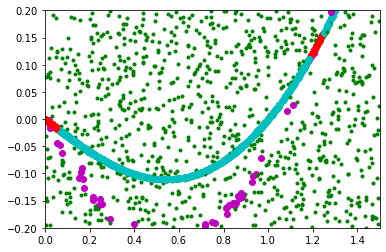

In [158]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [149]:
def Error_func(hh, m, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=batch-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [159]:
for i in range (set):
    print(Error_func(h_real, m2, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, m2_2, Positive[i], Negative[i]))

tf.Tensor(0.0002212319268695323, shape=(), dtype=float64)
tf.Tensor(0.00022154856328517492, shape=(), dtype=float64)
tf.Tensor(1.9021350852691086, shape=(), dtype=float64)
tf.Tensor(0.008290986344383874, shape=(), dtype=float64)
tf.Tensor(0.00022163743421956428, shape=(), dtype=float64)
tf.Tensor(0.0002214121884560788, shape=(), dtype=float64)
tf.Tensor(0.0002215178925091449, shape=(), dtype=float64)
tf.Tensor(1.0002214111877936, shape=(), dtype=float64)
tf.Tensor(0.9978674890793252, shape=(), dtype=float64)
tf.Tensor(0.0405129247095092, shape=(), dtype=float64)
tf.Tensor(1.0002207617573229, shape=(), dtype=float64)
tf.Tensor(0.0002214013459611769, shape=(), dtype=float64)
tf.Tensor(0.9992426834811992, shape=(), dtype=float64)
tf.Tensor(1.0016095608575388, shape=(), dtype=float64)
tf.Tensor(0.9927382701397993, shape=(), dtype=float64)
tf.Tensor(0.00022174177857716304, shape=(), dtype=float64)
tf.Tensor(0.8129502842913663, shape=(), dtype=float64)
tf.Tensor(0.7730034496893358, shape=(),

tf.Tensor(10.989884275844165, shape=(), dtype=float64)
tf.Tensor(8.999384376644144, shape=(), dtype=float64)
tf.Tensor(9.44613984140979, shape=(), dtype=float64)
tf.Tensor(9.051846258024534, shape=(), dtype=float64)
tf.Tensor(12.011324665900602, shape=(), dtype=float64)
tf.Tensor(10.015556571387433, shape=(), dtype=float64)
tf.Tensor(8.414428624602023, shape=(), dtype=float64)
tf.Tensor(9.628913644570499, shape=(), dtype=float64)
tf.Tensor(10.014968234656424, shape=(), dtype=float64)
tf.Tensor(8.01900188733405, shape=(), dtype=float64)
tf.Tensor(9.015571366464656, shape=(), dtype=float64)
tf.Tensor(10.015556571204069, shape=(), dtype=float64)
tf.Tensor(10.081872088417287, shape=(), dtype=float64)
tf.Tensor(11.015552174387656, shape=(), dtype=float64)
tf.Tensor(9.982261193858974, shape=(), dtype=float64)
tf.Tensor(11.016227793286689, shape=(), dtype=float64)
tf.Tensor(9.999603736560024, shape=(), dtype=float64)
tf.Tensor(9.014906997651005, shape=(), dtype=float64)
tf.Tensor(9.0296959968

In [151]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2]))

201 10.646415536245108 -1.1383348479873796
[0.65218518 2.12403507 0.30450913 1.57269722 1.65844797 2.11994551
 3.12402019 3.24747537 5.31390053 9.8551577 ]


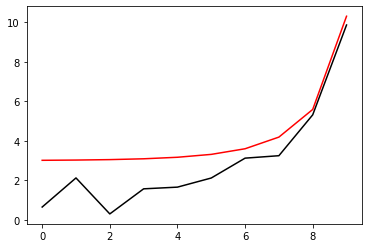

402 9.830729796787425 -1.1410774289761418
[0.6845078  2.15291084 0.33784177 1.6007327  1.68269464 2.13475843
 3.1231855  3.22954889 5.28216215 9.79559068]


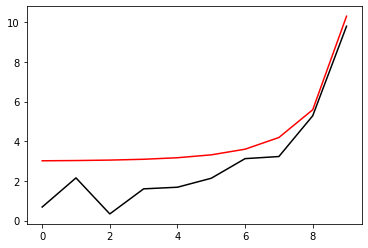

603 9.844981021527687 -1.1433376596927916
[0.72699862 2.19219784 0.38120094 1.63887644 1.71678458 2.15894504
 3.13018713 3.21605026 5.25075599 9.78401176]


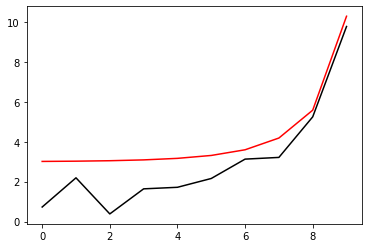

804 10.014663432914878 -1.1487134160369883
[0.76660392 2.22824741 0.42094643 1.67276705 1.74570947 2.1766884
 3.12936855 3.19394909 5.21073313 9.78141082]


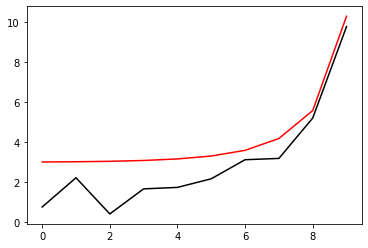

1005 8.970345424010812 -1.1480722461974109
[0.78839603 2.24604337 0.44256764 1.68820064 1.75611112 2.1759753
 3.11126913 3.15818329 5.16217305 9.77911447]


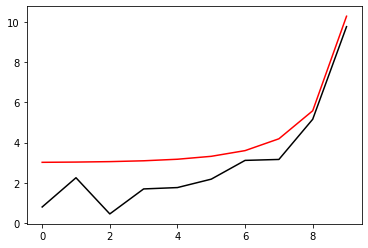

1206 11.529587203984299 -1.14628005368624
[0.79851896 2.25157092 0.45190902 1.69089647 1.75362121 2.16233575
 3.08114191 3.11334946 5.1086071  9.77662122]


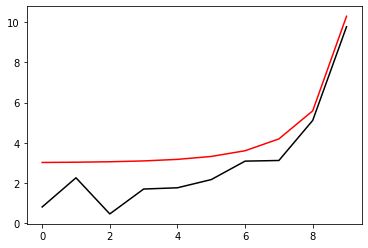

1407 10.015366501216924 -1.1458123075731534
[0.80624305 2.25453514 0.45891436 1.69116761 1.74880913 2.14644982
 3.04906733 3.06758984 5.05551043 9.77411047]


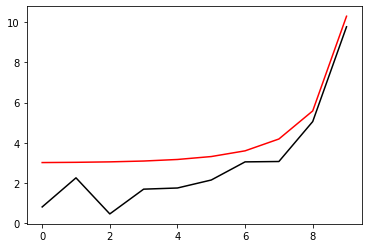

1608 9.78516008332468 -1.144915238660502
[0.81024106 2.25352684 0.46199326 1.68738623 1.74000765 2.12678527
 3.01388364 3.02011376 5.00228335 9.77162665]


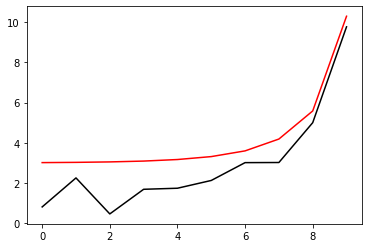

1809 8.014793280083992 -1.145067760598933
[0.81757387 2.25591429 0.46837214 1.68712141 1.73500236 2.11138558
 2.98324    2.97676807 4.95255318 9.7692499 ]


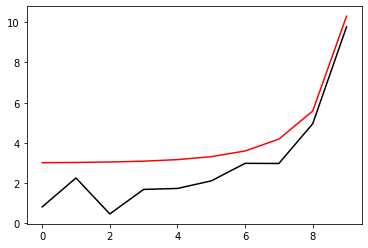

2010 8.084455053511066 -1.116605669025817
[0.81873075 2.25296413 0.47003289 1.68232124 1.72503497 2.08982346
 2.94440224 2.92306369 4.89116939 9.76655486]


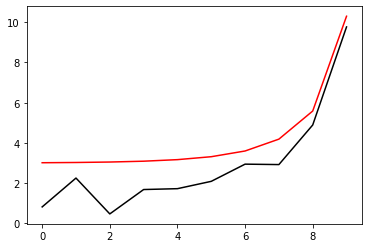

2211 7.980502558362978 -1.0865756283281314
[0.81983476 2.24857672 0.4686421  1.67271681 1.70809853 2.05875393
 2.89343959 2.85557477 4.81618873 9.76312105]


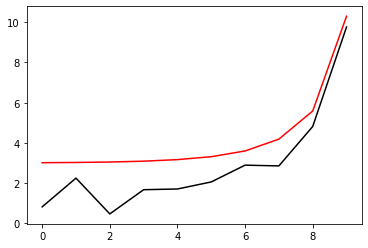

2412 9.116589527489989 -1.0732859980746337
[0.84071841 2.26354866 0.48610911 1.6807823  1.7070155  2.04044252
 2.85056133 2.79088004 4.73928631 9.75964125]


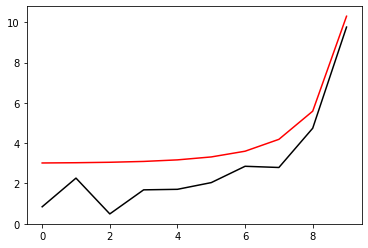

2613 7.984232783239018 -1.0742339220626136
[0.86835035 2.28471755 0.5094654  1.69424176 1.71094695 2.02669213
 2.81202341 2.73098835 4.66765615 9.75617666]


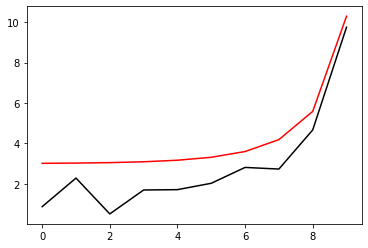

2814 8.863635444291972 -1.0840181671879212
[0.8957709  2.3044797  0.53037254 1.70400848 1.7098529  2.00641733
 2.76609361 2.66460654 4.59128953 9.75259236]


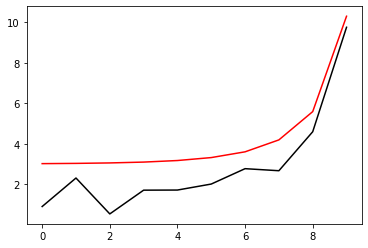

3015 12.013993462053683 -1.069978592080197
[0.91928846 2.32082702 0.54841896 1.7105486  1.70439266 1.97935848
 2.71060232 2.58775286 4.50508523 9.74874438]


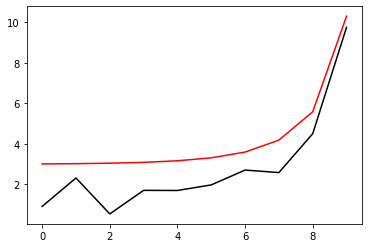

3216 7.941158432440744 -1.0730633950064028
[0.95332057 2.34692215 0.5753824  1.72444858 1.70385373 1.95319468
 2.65154652 2.50516137 4.41240497 9.74451881]


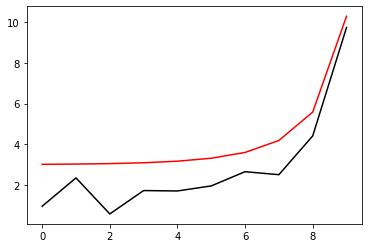

3417 7.837797096646469 -1.070211981143623
[0.99203865 2.37815455 0.60791863 1.74385461 1.70815147 1.93000708
 2.59317786 2.42229769 4.31898197 9.74016414]


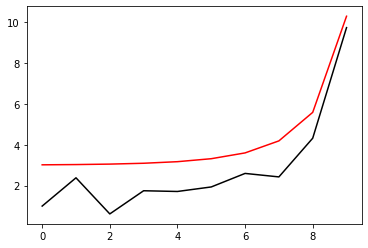

3618 11.999434312209162 -1.07085448423497
[1.03668717 2.41580033 0.64741661 1.77028726 1.71888834 1.91124681
 2.5364956  2.33948587 4.22452398 9.73567963]


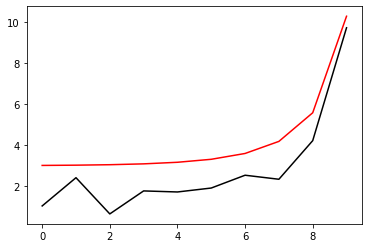

3819 9.777325824278147 -1.0707726412647558
[1.07277391 2.44620785 0.68144917 1.79282818 1.72770206 1.89323938
 2.48414613 2.26349728 4.13755089 9.73166564]


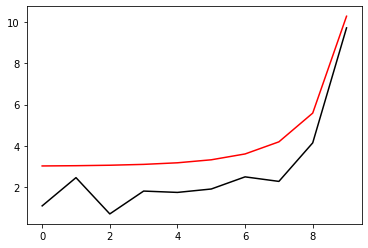

4020 8.35577034760134 -1.0718254141728947
[1.11410154 2.48102083 0.71903735 1.81796428 1.73795733 1.87540965
 2.43088574 2.18556183 4.04761328 9.72757145]


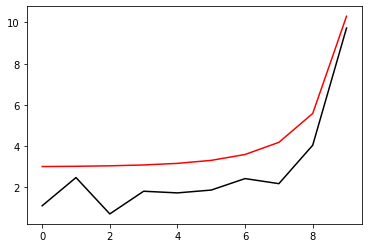

4221 9.013472495414984 -1.0684373918960122
[1.15695908 2.51792144 0.75946376 1.8473442  1.75469358 1.86736088
 2.39056927 2.12163632 3.97124107 9.72404312]


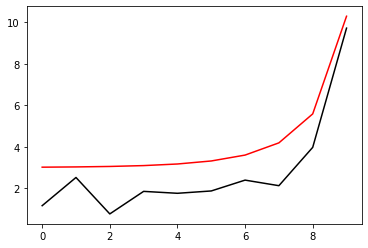

4422 9.487419246137023 -1.0656038060250927
[1.20238179 2.55642008 0.80053585 1.87752135 1.7733679  1.86389697
 2.35767351 2.06649859 3.90415922 9.72090235]


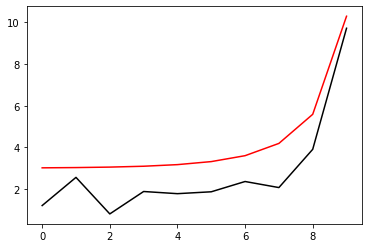

4623 6.641821160937923 -1.0878678869253566
[1.25633451 2.6025278  0.84794045 1.91344272 1.79715882 1.86474683
 2.32695366 2.01080999 3.83495233 9.71778045]


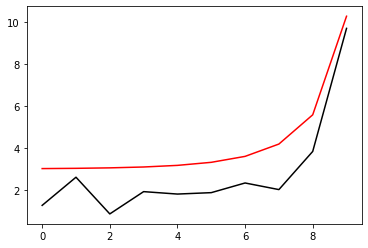

4824 11.006984770228092 -1.0814162531117306
[1.29690869 2.63398548 0.87909425 1.93083101 1.79936432 1.84061853
 2.26995644 1.93154951 3.74630905 9.71371396]


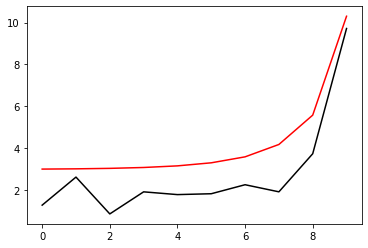

5025 8.300631178915204 -1.0735801316093876
[1.33937421 2.6697039  0.91667781 1.95772047 1.81482855 1.83421288
 2.23333829 1.87145445 3.67434804 9.71035853]


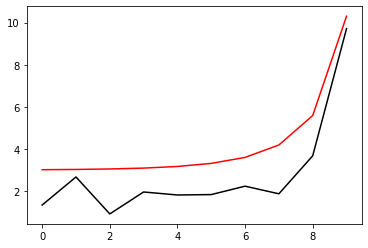

5226 9.02805954564181 -1.0709458191597327
[1.38476112 2.70922156 0.95894255 1.99064492 1.83809582 1.83802032
 2.20861651 1.82193676 3.61017568 9.70737514]


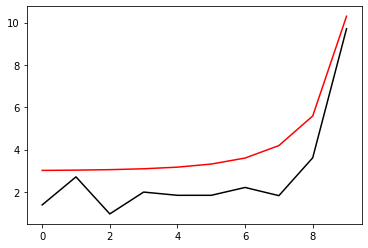

5427 8.013028476614199 -1.0701986924630926
[1.42017649 2.73830869 0.99072953 2.01280604 1.85077667 1.83232646
 2.17729437 1.76968379 3.54663237 9.70443334]


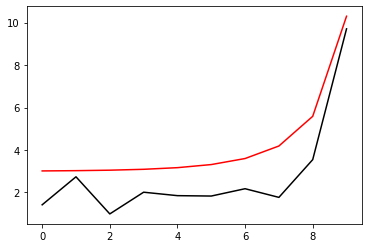

5628 9.229988383718773 -1.0687669338852788
[1.45633767 2.76834401 1.02390561 2.03673487 1.86581536 1.82963073
 2.14930127 1.72050335 3.48566313 9.70163657]


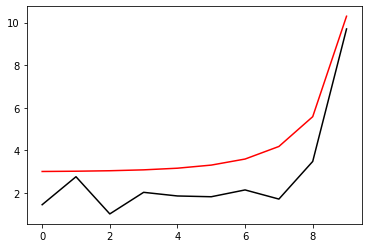

5829 7.9781428845086 -1.067702861285099
[1.48378647 2.79026884 1.04967229 2.05447947 1.87648609 1.82564119
 2.12397289 1.67671621 3.43144201 9.69919532]


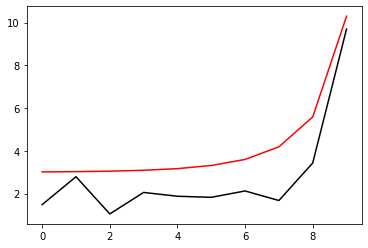

6030 7.099122539797431 -1.067698803989702
[1.51504579 2.81583421 1.07840028 2.07468871 1.88870469 1.82195495
 2.0969575  1.6286948  3.37125972 9.69646067]


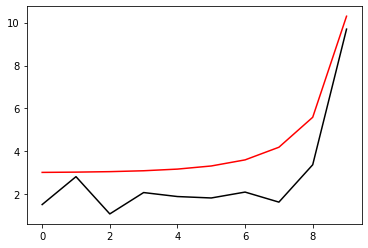

6231 8.086337360810354 -1.0650673524084708
[1.5788897  2.87411641 1.13869149 2.12531159 1.92860519 1.84062676
 2.082148   1.5794343  3.29838448 9.69311091]


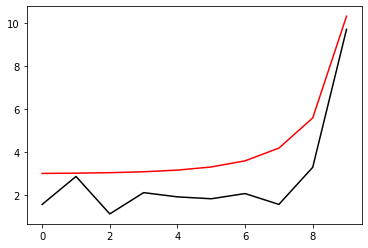

6432 8.019412045983477 -1.0397982663437404
[1.63805371 2.92696192 1.19198157 2.16580527 1.95307637 1.83555939
 2.03378905 1.49116408 3.18680482 9.68814692]


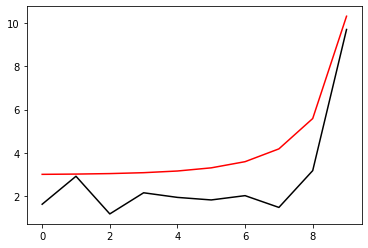

6633 10.012335542263381 -1.0285771863462903
[1.73832983 3.01952651 1.28256464 2.24118131 2.00816369 1.85302574
 1.99476503 1.39967845 3.06311899 9.68244635]


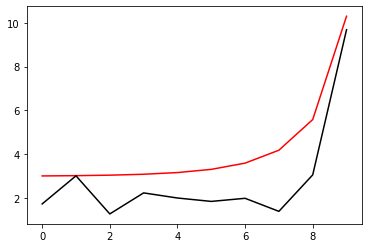

6834 5.904533964861592 -1.0187687301772224
[1.85896558 3.13123089 1.39015965 2.33225469 2.07695158 1.88079754
 1.96062102 1.30918346 2.93924861 9.67675403]


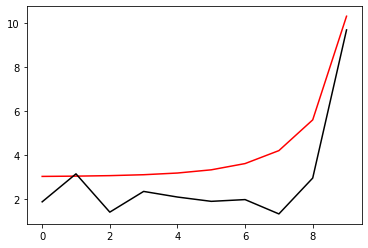

7035 3.600659971517884 -0.9740753307750126
[2.02188458 3.29079351 1.548767   2.4781235  2.20104824 1.95737582
 1.95445933 1.22038456 2.79869454 9.67022572]


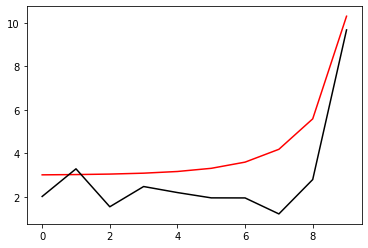

7236 6.090011127806075 -0.9398323983070304
[2.1500041  3.42095765 1.6842878  2.61105811 2.32748742 2.05925246
 1.99225808 1.17670014 2.7034495  9.66577473]


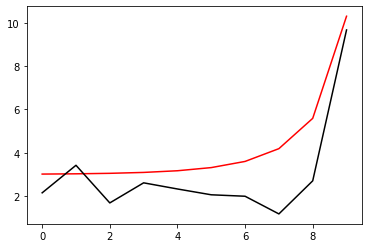

7437 2.12113362873757 -0.9465669430605229
[2.18614322 3.45656458 1.72674519 2.65294878 2.37152487 2.10123435
 2.0212898  1.18228371 2.6893212  9.66516093]


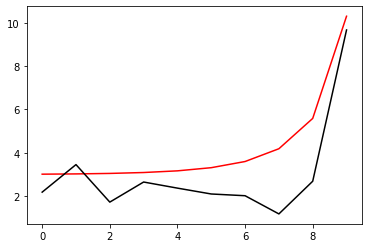

7638 4.07164970700956 -0.9674984658407495
[2.2956843  3.56564695 1.84018806 2.76339006 2.478084   2.19293246
 2.07262032 1.17247084 2.63140586 9.66256452]


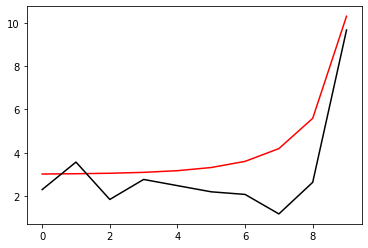

7839 1.0688539358714884 -0.9938730696920085
[2.4736506  3.74029409 2.01382039 2.93034093 2.63553006 2.32746183
 2.15209694 1.16602368 2.55235183 9.65892373]


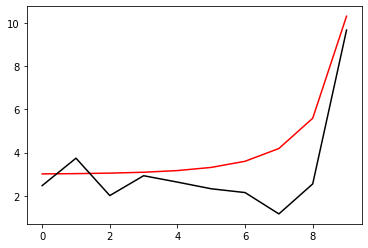

8040 2.01650478007204 -1.0081760160304072
[2.65503384 3.91414754 2.18284163 3.09219989 2.79061314 2.46924782
 2.2586305  1.20403664 2.52192891 9.65748081]


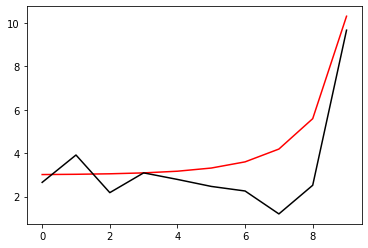

8241 1.0158540456704257 -1.0071254446944091
[2.66250296 3.9196549  2.19427654 3.10347732 2.80654406 2.49074347
 2.28672443 1.23489003 2.5475481  9.65865318]


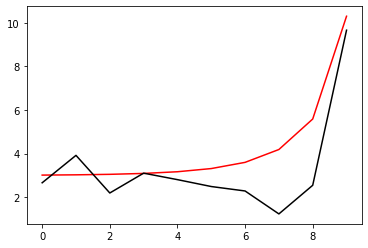

8442 0.014761098652467927 -1.006918211032607
[2.66377847 3.91878296 2.19993406 3.10885411 2.8168329  2.50686972
 2.31025884 1.26345888 2.57367697 9.65985249]


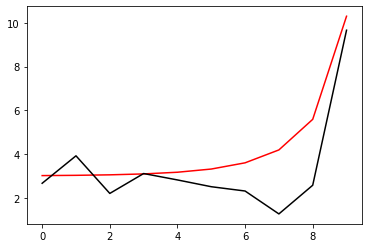

8643 0.020755113518181125 -1.006866509326261
[2.66218256 3.91481606 2.20300142 3.11150062 2.82462626 2.52072252
 2.33197788 1.29134491 2.60048472 9.66108116]


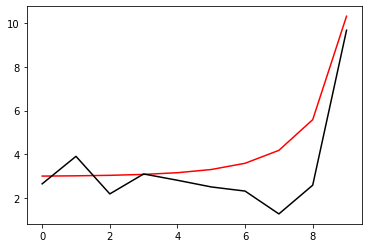

8844 1.013932442026603 -1.0068987061249548
[2.65929935 3.9092948  2.20494547 3.11284949 2.83132303 2.53365923
 2.35308015 1.31926421 2.62805605 9.66234384]


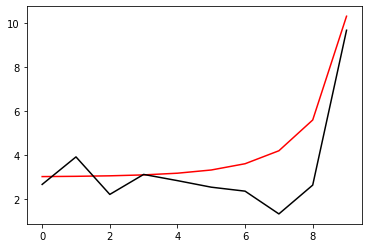

9045 0.013820434078777012 -1.0069844490083657
[2.65596014 3.90301384 2.20650329 3.11359932 2.8375826  2.5462947
 2.37408415 1.34749305 2.65634502 9.66363927]


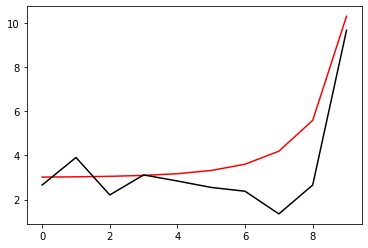

9246 0.9994669920506374 -1.007096803059201
[2.65260974 3.89638716 2.20803875 3.11407391 2.84368687 2.55886651
 2.39516538 1.37608041 2.68522149 9.66496195]


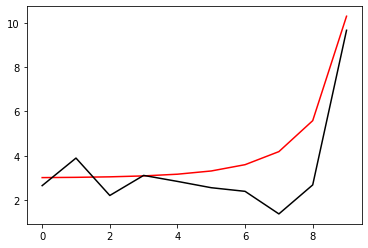

9447 1.0045212413715812 -1.0072267288070749
[2.64948754 3.88963627 2.2097335  3.11442271 2.84975007 2.5714551
 2.41637035 1.4050024  2.71453526 9.66630557]


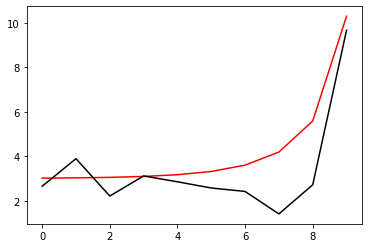

9648 0.01743587889330979 -1.0073547729331072
[2.64675254 3.8829205  2.21171938 3.11476165 2.85586897 2.58414586
 2.43778343 1.43430312 2.74420711 9.66766685]


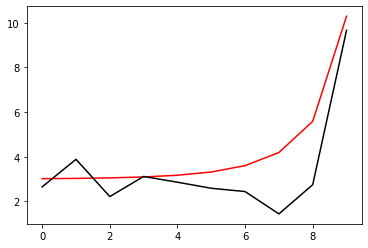

9849 0.015836658293545865 -1.0074856140092443
[2.64454244 3.87639664 2.21413777 3.11523904 2.8621972  2.59711671
 2.45962902 1.46419932 2.7743203  9.66904903]


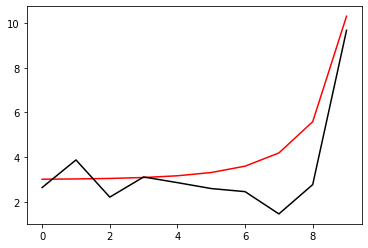

In [160]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.012393799153354321 -1.0015373675500967
[2.64106981 3.85733938 2.22672273 3.12073218 2.88779511 2.64716757
 2.54234493 1.56670288 2.85586132 9.67280132]


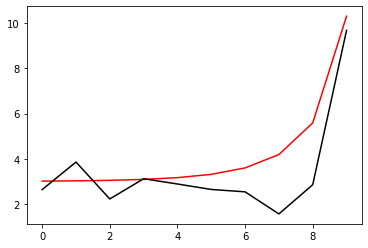

402 3.011061084905992 -1.0009485605942512
[2.63926766 3.84930842 2.2321038  3.12344494 2.9011432  2.67487578
 2.59249156 1.63409589 2.91545735 9.67552215]


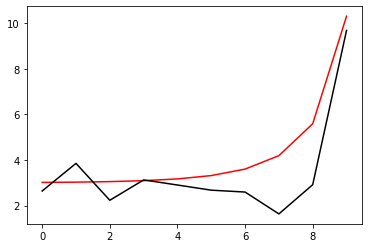

603 2.067701244908873 -1.000901139152732
[2.64051424 3.8456728  2.24078838 3.13081823 2.91882424 2.70593614
 2.64305576 1.70204923 2.97942212 9.67847441]


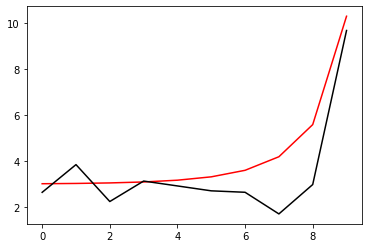

804 0.90370861545454 -1.0024624180403154
[2.64647243 3.8477313  2.25492359 3.14479034 2.9431282  2.74275731
 2.69612907 1.77002236 3.04715756 9.68156356]


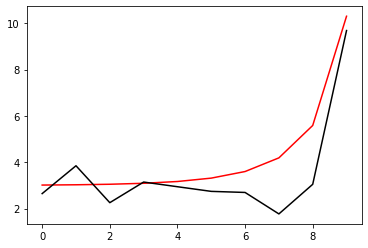

1005 0.010716138151491902 -1.000725646188668
[2.64258447 3.84090818 2.26135601 3.15221821 2.9617115  2.77408267
 2.74294503 1.83203579 3.11434412 9.68460758]


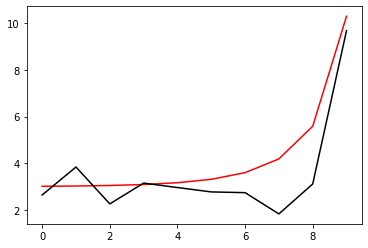

1206 0.010570485164411685 -1.0049800417397405
[2.65412017 3.84985071 2.28329363 3.17520786 2.99516895 2.8187298
 2.79979422 1.89901662 3.18190565 9.68767227]


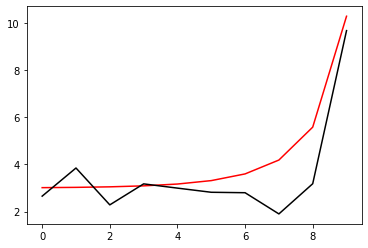

1407 1.010369539805287 -1.0023147072449679
[2.65905722 3.85397699 2.30234305 3.19745976 3.02987275 2.86647864
 2.86138785 1.97264149 3.25934495 9.69123398]


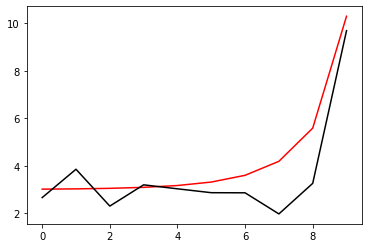

1608 1.0102546366089715 -1.000628102143476
[2.66719826 3.86124905 2.32378289 3.22162203 3.06512662 2.91289368
 2.91935305 2.04096202 3.33204747 9.69460247]


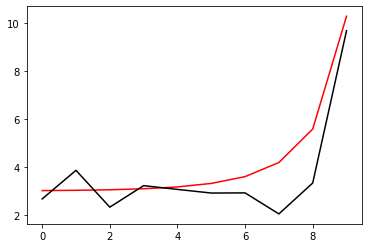

1809 0.9925510579137593 -1.0034399304386612
[2.67059714 3.86318447 2.33911167 3.23893708 3.09264342 2.95067651
 2.96791921 2.09963336 3.39591828 9.69752542]


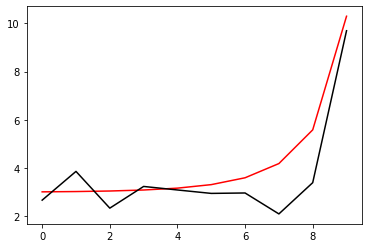

2010 1.005503441895141 -1.0074159175960127
[2.66792226 3.85861927 2.34780214 3.24934157 3.11313735 2.98139475
 3.00954032 2.15186472 3.45455178 9.70019304]


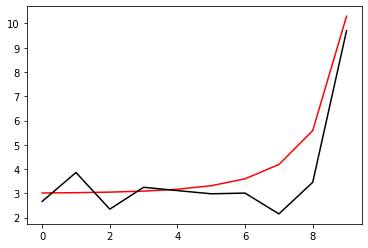

2211 0.01000054182070031 -1.010806129984892
[2.68786768 3.876071   2.37771051 3.27978457 3.15191376 3.02791668
 3.06351532 2.21207946 3.51629674 9.70304387]


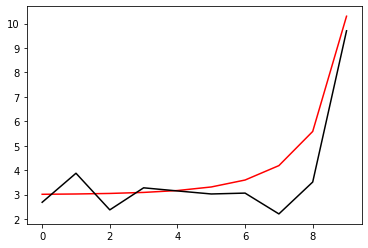

2412 1.0098629672516346 -1.0082291309513967
[2.70668862 3.89193001 2.40633914 3.30839068 3.18842379 3.07142451
 3.1134902  2.26736707 3.57253791 9.7056462 ]


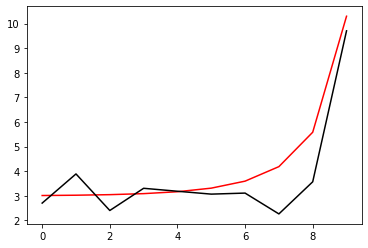

2613 1.4496638734990284 -1.0068364475678635
[2.74555753 3.93139697 2.46132005 3.36688092 3.25779973 3.15072668
 3.20174111 2.36218595 3.6680276  9.70998884]


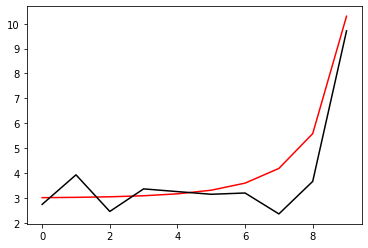

2814 1.009694366446555 -1.0102453182649318
[2.73425035 3.92135197 2.46698994 3.37707691 3.28011342 3.18513881
 3.24883472 2.42185338 3.73704144 9.71313396]


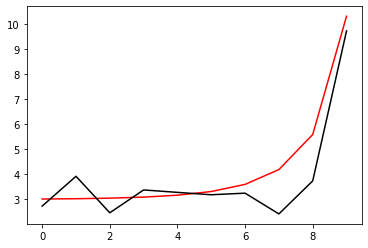

3015 0.049103823731185596 -1.009962939395283
[2.72193117 3.90983666 2.46967968 3.38378017 3.29815254 3.21474867
 3.29077912 2.47613501 3.80042122 9.71602384]


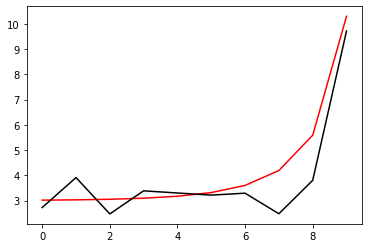

3216 1.0091535233839168 -1.009376556422732
[2.71258312 3.90017961 2.47283261 3.38971167 3.31408613 3.24095525
 3.32808265 2.5246886  3.8571221  9.71861441]


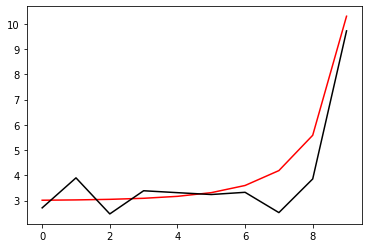

3417 0.6677162464058527 -1.0093385251315448
[2.70311684 3.88980449 2.47458    3.39364013 3.3274405  3.26410603
 3.36200022 2.56972675 3.91030027 9.72104154]


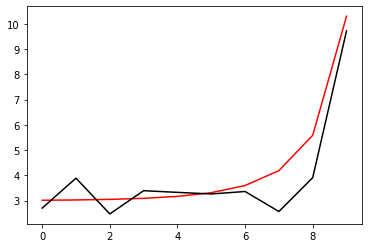

3618 1.0128266905819687 -1.0099600438791594
[2.69356911 3.87906634 2.47557493 3.39647538 3.33933587 3.28548351
 3.39392342 2.6126911  3.96138188 9.72338882]


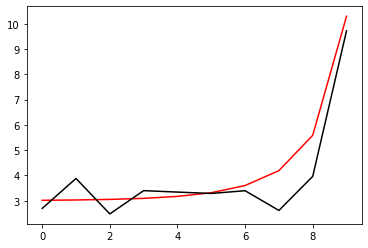

3819 1.9581268218234562 -1.0085724859145946
[2.68069185 3.86559049 2.47430926 3.3973751  3.34950282 3.30524218
 3.42426019 2.65405211 4.01071824 9.72564765]


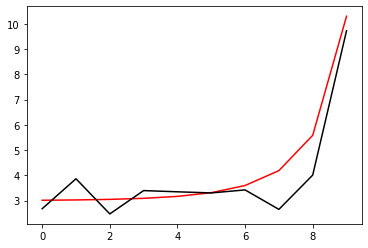

4020 0.009431912917801745 -1.0084788651205512
[2.67018537 3.85413029 2.47473759 3.39955077 3.36049639 3.32531076
 3.45432211 2.69454175 4.05856624 9.72783738]


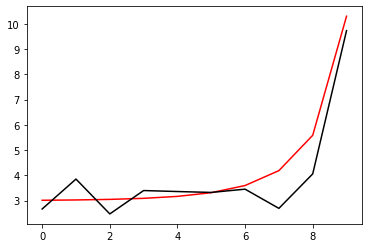

4221 0.009238966153470916 -1.0092863122457172
[2.66624339 3.84816298 2.47970889 3.40524656 3.37402308 3.3469036
 3.48488014 2.73455698 4.10502219 9.72996894]


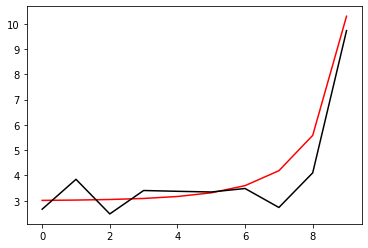

4422 0.010333057511959998 -1.0086063448809586
[2.66064288 3.84053979 2.48328444 3.40949909 3.38616297 3.36714227
 3.51413271 2.77336332 4.15029426 9.73204683]


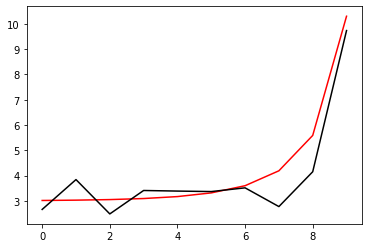

4623 0.010136077980176168 -1.008561122910855
[2.65986371 3.83709824 2.49075634 3.41703176 3.40108743 3.38959685
 3.54494714 2.81301098 4.19555252 9.73412858]


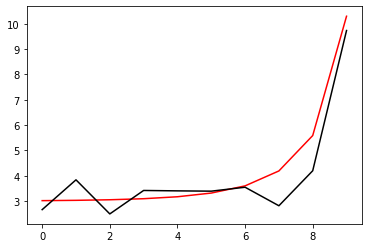

4824 1.009758380898965 -1.007542462442382
[2.66094993 3.83551505 2.50032359 3.42659776 3.41804675 3.4140122
 3.57756506 2.85422684 4.24199884 9.7362739 ]


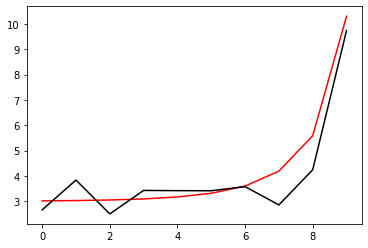

5025 1.0088712045884247 -1.0002731977749528
[2.65103633 3.82420838 2.50150555 3.42889168 3.42883878 3.43334975
 3.60628173 2.89292544 4.28749244 9.73840304]


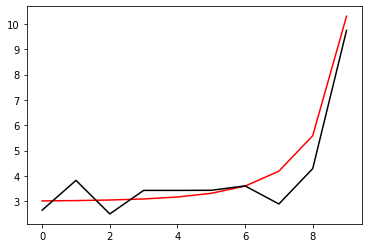

5226 2.023392697547896 -0.9852355330980008
[2.66990292 3.8410728  2.52865185 3.45675083 3.46440938 3.47710188
 3.65911545 2.95484424 4.35425122 9.74140711]


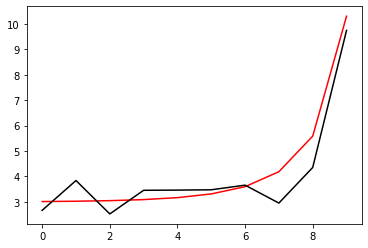

5427 0.035398555379093255 -0.9858889873899543
[2.66945964 3.83875629 2.53581773 3.46523513 3.48137675 3.5041005
 3.69840857 3.00747258 4.41590542 9.74422193]


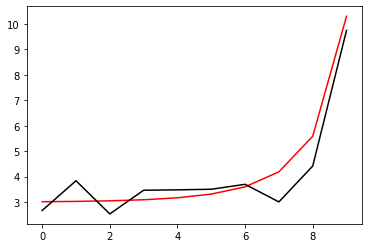

5628 0.05328039586166037 -0.9855117154092081
[2.66464333 3.83211164 2.53832395 3.46875299 3.49272757 3.52464957
 3.73032563 3.05197307 4.46893925 9.74663896]


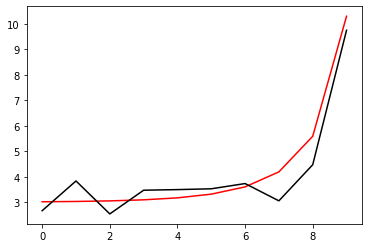

5829 0.09167782642958991 -0.9852301552569451
[2.65807937 3.82383891 2.53922458 3.4707872  3.50270444 3.54405156
 3.76149939 3.09625832 4.52215185 9.74906581]


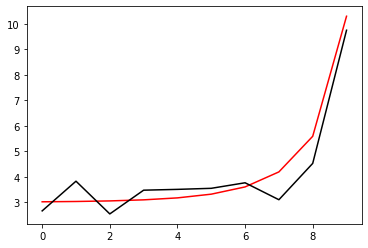

6030 0.04649963951637616 -0.9850879970515616
[2.65094945 3.81510551 2.53961744 3.47241726 3.51234269 3.56328926
 3.79282916 3.14109155 4.57613568 9.75153963]


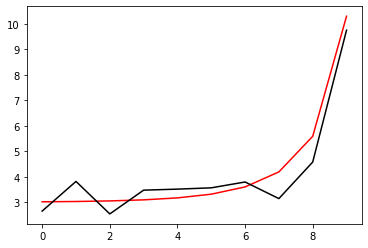

6231 0.08185139524916149 -0.9853428527423508
[2.64447074 3.80717339 2.54075292 3.47495921 3.52301729 3.58382646
 3.82588073 3.18809236 4.63245541 9.75413089]


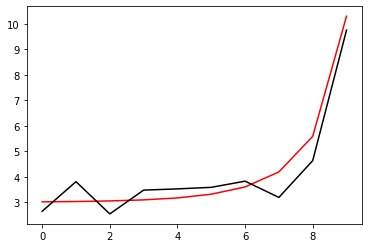

6432 0.07130627840129257 -0.9858979517607769
[2.63934069 3.80082311 2.54338944 3.47916813 3.53536756 3.60609371
 3.86078083 3.23710276 4.69082709 9.75682942]


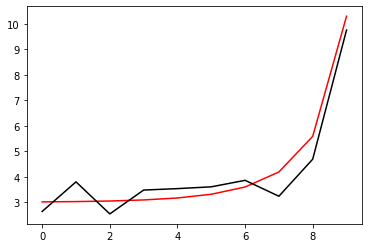

6633 0.008571272403826423 -0.9959699343093759
[2.63790517 3.7981195  2.54920669 3.48655238 3.55073604 3.63138524
 3.89892236 3.2897667  4.75325902 9.75966121]


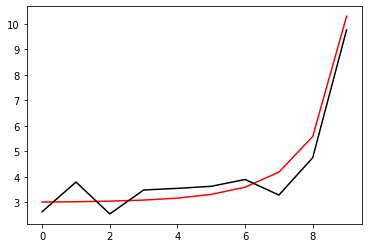

6834 0.05686161994322728 -0.9879366877853597
[2.63272845 3.79192094 2.55126524 3.48968543 3.56059844 3.64906846
 3.92639591 3.32852986 4.79971774 9.76184305]


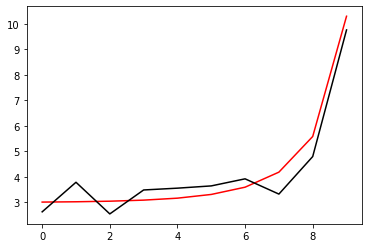

7035 1.0083129105567812 -0.9977505746366923
[2.61701652 3.77445845 2.54145492 3.48046004 3.55784206 3.65426777
 3.94232666 3.35800618 4.84029627 9.76368855]


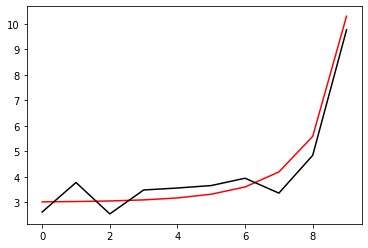

7236 0.015113245349727656 -0.9897884171103314
[2.62744763 3.7841051  2.55936272 3.49968903 3.5839615  3.68833865
 3.98599445 3.41188135 4.89946891 9.76642584]


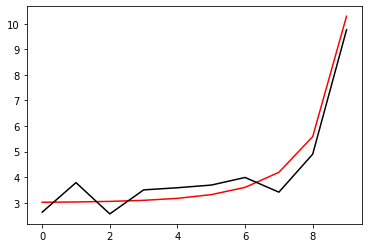

7437 0.010989328247080935 -0.99292511586871
[2.63419965 3.7895535  2.57250183 3.51341527 3.60363699 3.71475787
 4.02065313 3.45589308 4.94913869 9.76868789]


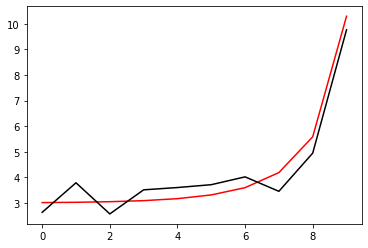

7638 0.008782758680603086 -0.9915935250483819
[2.61442715 3.76886096 2.56012444 3.50259222 3.60032115 3.72076442
 4.03926348 3.49060837 4.99797604 9.77093292]


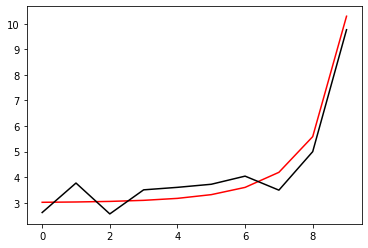

7839 0.013775540497936271 -0.9914849380026568
[2.62054534 3.77346277 2.57209353 3.51515229 3.61893814 3.74660733
 4.07440132 3.5367722  5.05146368 9.77337349]


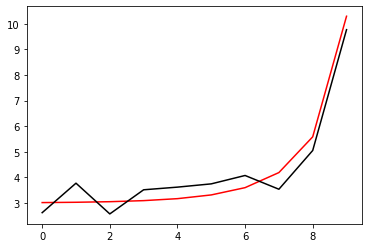

8040 0.008234011451452717 -0.9973447831151739
[2.61657241 3.76836772 2.57476341 3.51880248 3.6290838  3.76458528
 4.10270885 3.57793764 5.10252552 9.77567332]


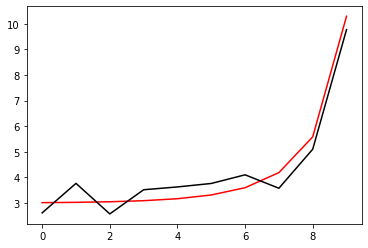

8241 0.03201639126387124 -0.9897879531474456
[2.59919197 3.75086396 2.56590272 3.51213533 3.63037778 3.77582299
 4.12748282 3.62006356 5.15955017 9.77829889]


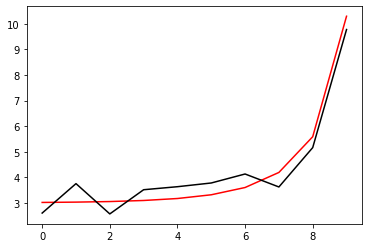

8442 0.0480239635754752 -0.9890301872177776
[2.58934298 3.73962021 2.56162741 3.50876362 3.63339338 3.78709435
 4.15042284 3.65848716 5.21125663 9.78066629]


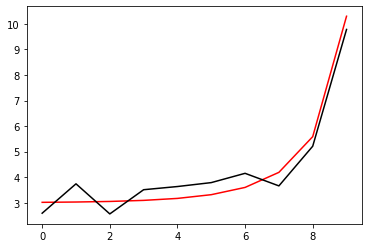

8643 0.008817259798222494 -0.9940171722365945
[2.57611052 3.72452556 2.55278102 3.5005762  3.63133423 3.79333173
 4.16890646 3.69386142 5.26188257 9.7829886 ]


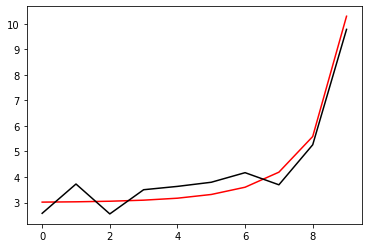

8844 0.017629350349943146 -0.9904018754263646
[2.57189348 3.71860956 2.55274098 3.50089701 3.63701552 3.80608723
 4.19189993 3.73057979 5.30938712 9.78515247]


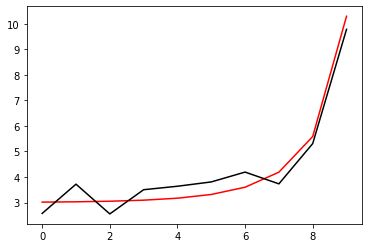

9045 0.015084729458046552 -0.9895029612596146
[2.56956745 3.71434827 2.5541854  3.50252864 3.64387246 3.81991586
 4.21590811 3.76824584 5.35746793 9.7873642 ]


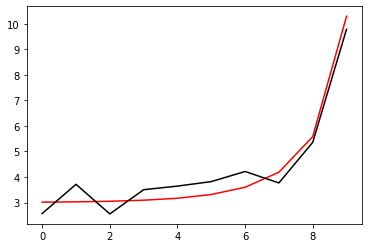

9246 1.0591088106136688 -0.9900339994247055
[2.57345841 3.71595458 2.56108713 3.50920648 3.65527312 3.83763579
 4.24284643 3.80738372 5.40494838 9.78954468]


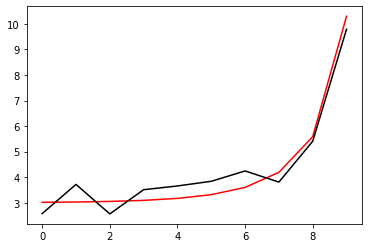

9447 1.013341479948125 -0.9902285805438635
[2.56559984 3.7064052  2.55737485 3.50580081 3.65713202 3.84652144
 4.26215158 3.84114913 5.45044378 9.79163717]


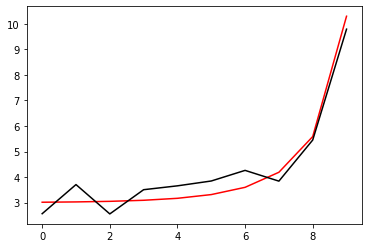

9648 0.03828060436357716 -0.9904448354363148
[2.5635761  3.7024978  2.55876554 3.50724412 3.66339681 3.85929047
 4.28460171 3.87686908 5.49590489 9.79372466]


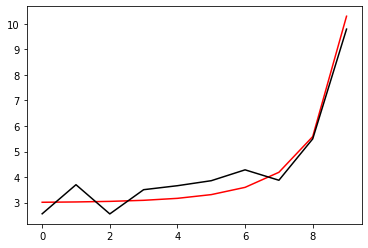

9849 0.010605160198792651 -0.9912922192711938
[2.55465309 3.69189906 2.55352722 3.50226483 3.66343126 3.86618617
 4.30196393 3.9091368  5.54014388 9.79574562]


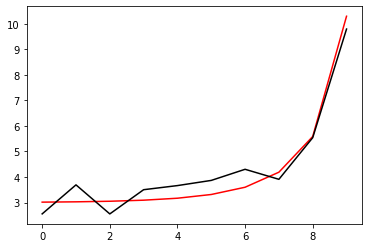

In [161]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.00773576245558329 -0.9993586485158528
[2.55076672 3.68212059 2.55244938 3.49809416 3.66507916 3.87592814
 4.32447409 3.95327681 5.60059169 9.79851403]


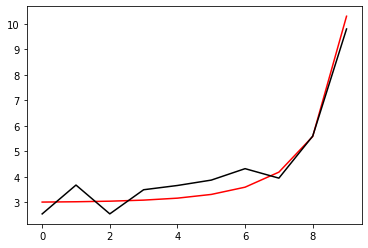

402 1.020464517834881 -0.9988807772012622
[2.54918486 3.67841513 2.55204492 3.49709304 3.66725162 3.8827403
 4.33884071 3.97917139 5.63561316 9.80009651]


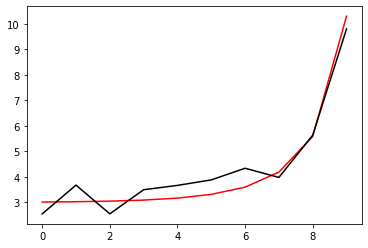

603 0.007658896418888509 -0.9987889004474058
[2.54771502 3.67483913 2.55178225 3.49630232 3.66973521 3.89002916
 4.35387271 4.00562193 5.67044562 9.80168807]


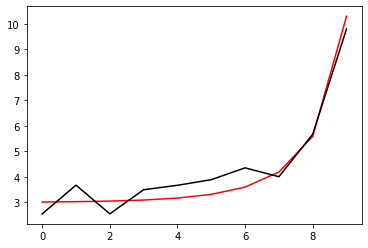

804 0.0077201645677985875 -0.998826361100466
[2.54630147 3.67131114 2.55156329 3.49556774 3.67229456 3.89742307
 4.369009   4.03200466 5.70485063 9.80326473]


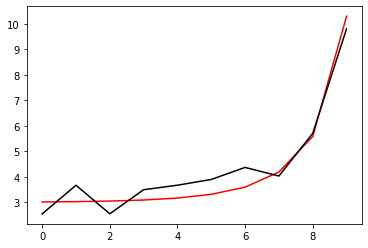

1005 0.00766312967825659 -0.998996963743899
[2.54494735 3.66782696 2.55137155 3.49485152 3.67485855 3.90479879
 4.3840599  4.05812698 5.73879076 9.80482319]


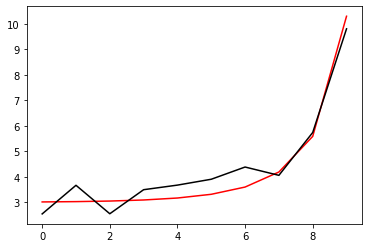

1206 0.0076556235968275625 -0.9992947218001232
[2.54364431 3.66438467 2.55119309 3.49414419 3.6774159  3.91215089
 4.39904695 4.0840897  5.77248175 9.80637302]


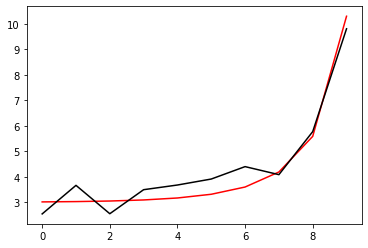

1407 1.0075987689178445 -0.9995711544243246
[2.54234194 3.66093982 2.55097396 3.49340338 3.67993452 3.91947437
 4.41402444 4.11004804 5.80617231 9.80792252]


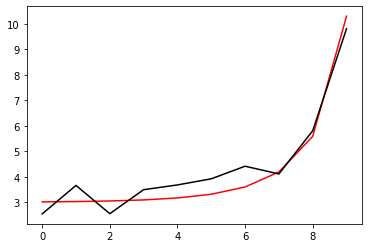

1608 0.3380231901697368 -0.999557660326986
[2.54130823 3.65780131 2.55107467 3.49303919 3.68288477 3.92730991
 4.42960573 4.13664044 5.84042114 9.80947265]


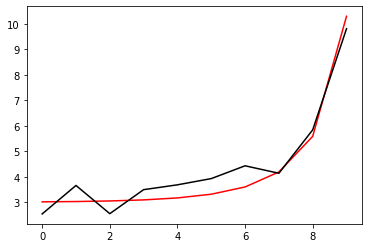

1809 0.008956708708829357 -0.9997724633974913
[2.54022735 3.65461653 2.55111848 3.49263933 3.68582208 3.93517724
 4.44528225 4.16338401 5.874876   9.81103431]


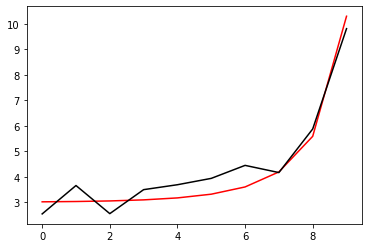

2010 1.0076881571993928 -0.9974173940263564
[2.53419706 3.64711161 2.54759712 3.4893447  3.68663549 3.94180942
 4.46082189 4.19127648 5.91174345 9.81272626]


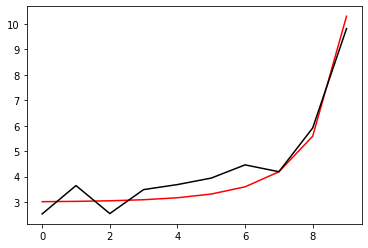

2211 0.007651080990552084 -0.9974806069672062
[2.53311848 3.64445106 2.54902873 3.49087573 3.69219599 3.95295543
 4.48029376 4.2219806  5.95004653 9.81448244]


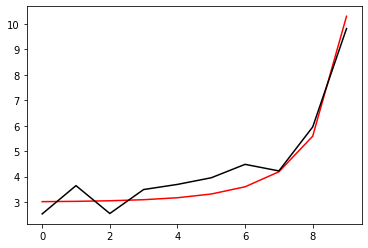

2412 0.3098171963317951 -0.9991471883473636
[2.53385722 3.64314588 2.55153839 3.49304429 3.69798941 3.96380937
 4.49876585 4.2509531  5.98629614 9.81610978]


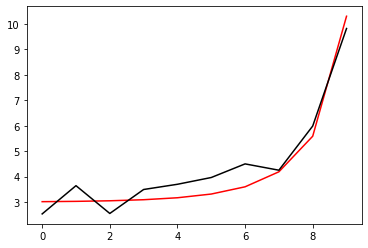

2613 0.32867250308064955 -0.9977912319988906
[2.53831006 3.64646627 2.55947931 3.50140074 3.71063285 3.98207912
 4.52494956 4.28722537 6.02842905 9.8180551 ]


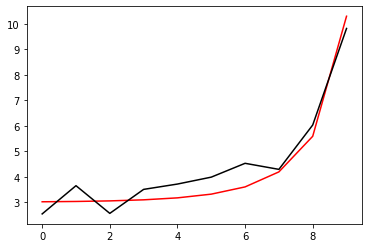

2814 0.03341161706799908 -0.9969193072328332
[2.52771067 3.63409483 2.5512787  3.49312061 3.70620885 3.98293303
 4.53384254 4.30796575 6.05953398 9.81944686]


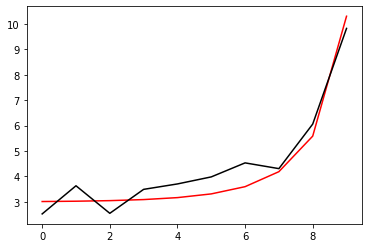

3015 0.008043993585553612 -0.996958077902564
[2.524891   3.62963771 2.55119776 3.49314594 3.71033096 3.99258074
 4.55161383 4.33706055 6.09755774 9.82118241]


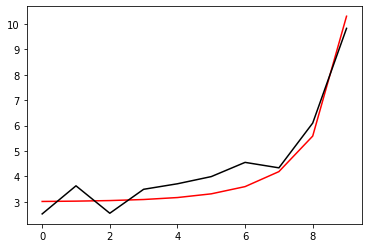

3216 0.009416572408715036 -0.9967254078326456
[2.52317571 3.62609102 2.55178473 3.49348879 3.71425768 4.00124035
 4.56717141 4.36239227 6.13062961 9.82271147]


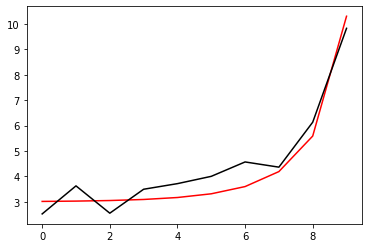

3417 0.9917027819995391 -0.9964351165430353
[2.52451618 3.62567246 2.55539255 3.49672342 3.72077462 4.01197689
 4.58392657 4.38759767 6.16204536 9.82416966]


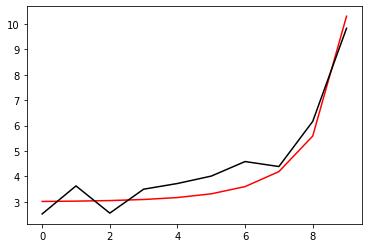

3618 0.18435624945508589 -0.9958863906674105
[2.52680894 3.62571679 2.55880547 3.49912716 3.725649   4.02003567
 4.59665226 4.4072951  6.18688943 9.82533039]


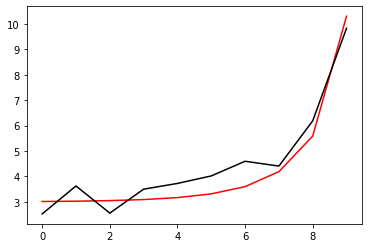

3819 1.0084014627873856 -0.9952748309481549
[2.51903614 3.61591544 2.55268448 3.49252074 3.72233141 4.02125102
 4.60481589 4.4259331  6.21473573 9.82662754]


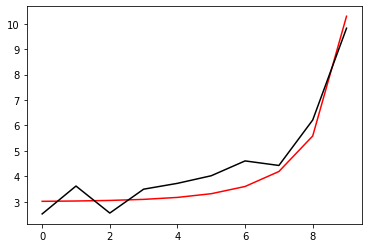

4020 0.013287239431581622 -0.9943398987578478
[2.52151913 3.61671979 2.5573795  3.49692715 3.73012024 4.0335258
 4.62357448 4.45365676 6.24865686 9.82818779]


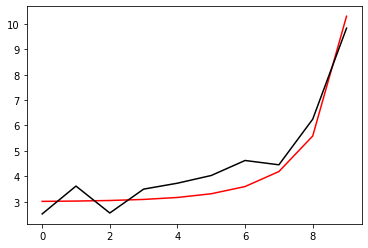

4221 0.009896464284714624 -0.995780737811548
[2.52434085 3.61718203 2.56089463 3.49926494 3.73471887 4.04115831
 4.63579673 4.47283038 6.272731   9.82932127]


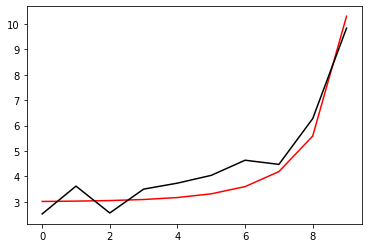

4422 0.015488875027951422 -0.993878350794893
[2.52245787 3.61336761 2.56078091 3.49871319 3.73752493 4.04861733
 4.65029786 4.49749929 6.30512694 9.83080345]


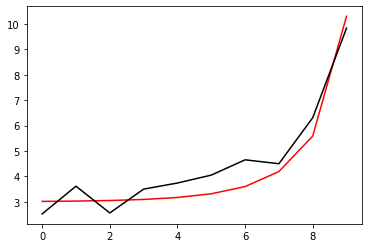

4623 0.007592438556539385 -0.9934577945844967
[2.5193817  3.60762114 2.55792417 3.4944848  3.73553799 4.04985255
 4.65676614 4.51238306 6.32696335 9.83179817]


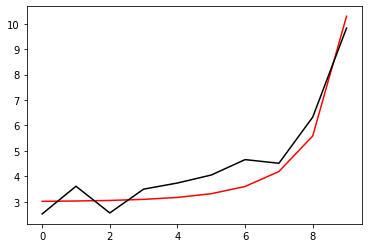

4824 1.028745640978614 -0.9931220048630002
[2.52058646 3.6060673  2.55910629 3.49409522 3.73713921 4.05431479
 4.66585326 4.52879965 6.34854868 9.83279401]


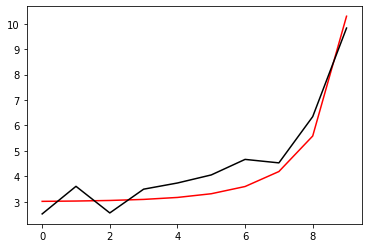

5025 1.0402021781339672 -0.9920032433269229
[2.51451832 3.59742926 2.55366748 3.48771344 3.73388514 4.05583951
 4.67524289 4.55008871 6.37913893 9.83418487]


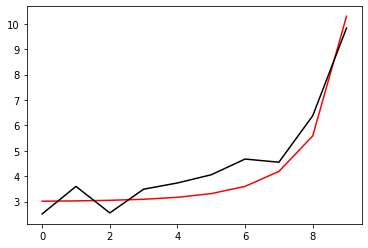

5226 2.011016774228514 -0.9962019587658846
[2.52135995 3.60174451 2.56086681 3.49352031 3.74186521 4.06689032
 4.69100812 4.57255894 6.40474638 9.83532934]


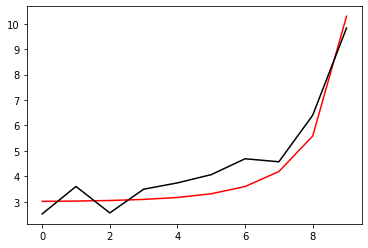

5427 0.06317671120303645 -0.9912508655207795
[2.51533611 3.59385966 2.55673605 3.48926065 3.74164172 4.07274163
 4.70657906 4.60195634 6.44401055 9.83712844]


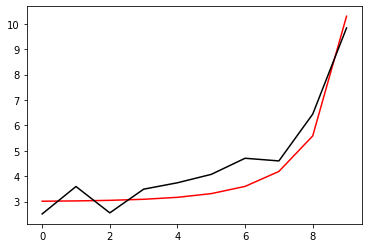

5628 0.1416474038210118 -0.9904700316478815
[2.510931   3.58752839 2.55395594 3.48614209 3.74220394 4.07886313
 4.72167325 4.62994695 6.48085018 9.83880112]


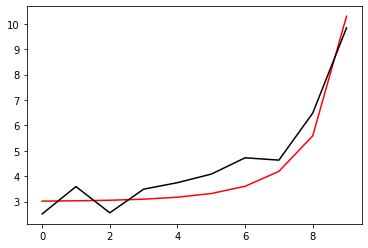

5829 0.18750968267676899 -0.9912776630475194
[2.50738764 3.58187107 2.55152308 3.48312729 3.74251348 4.08432009
 4.73564224 4.6564252  6.51597745 9.84040123]


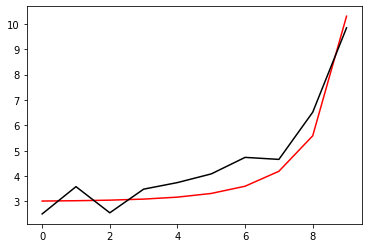

6030 0.15744834149958745 -0.9909420201898499
[2.50918056 3.58191629 2.55518633 3.48650838 3.7494641  4.09650479
 4.7559936  4.68796966 6.55388244 9.84216671]


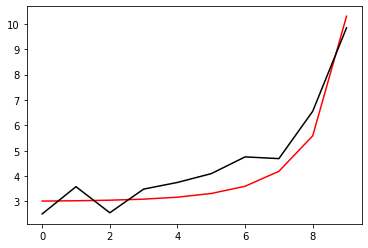

6231 0.09591239812001773 -0.9916358974250254
[2.50622724 3.57695596 2.55370902 3.48453895 3.75092332 4.10311507
 4.77093695 4.71505933 6.58928632 9.84377432]


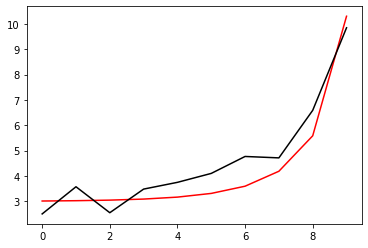

6432 0.062250498525845514 -0.992453736182694
[2.50746602 3.57603431 2.55614025 3.48602538 3.75513717 4.11121435
 4.78514664 4.73824062 6.61790461 9.84514779]


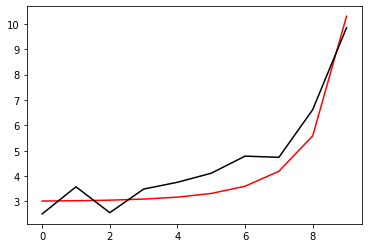

6633 0.023131540988309603 -0.9931840272898603
[2.50040738 3.56647045 2.54979693 3.47877503 3.75104905 4.11210285
 4.79451383 4.76079931 6.65070996 9.84655845]


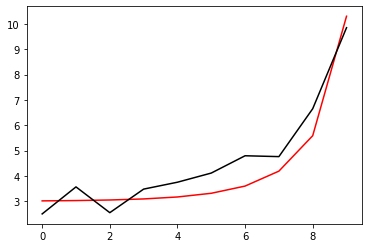

6834 0.08765384182996977 -0.9932390502011803
[2.49863103 3.56273779 2.54996676 3.47886961 3.75538267 4.12288784
 4.81566234 4.79666174 6.69678846 9.84869073]


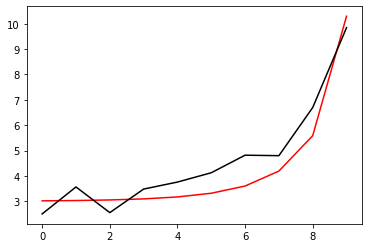

7035 0.99716156140639 -0.9933491639399873
[2.49725903 3.55927574 2.5502952  3.47890749 3.75930373 4.13264898
 4.83477713 4.8293052  6.73924493 9.85065754]


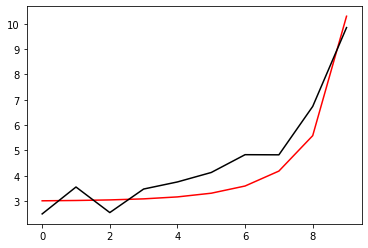

7236 0.02092276318233173 -0.9935904168158431
[2.49929581 3.55905249 2.55363487 3.48142494 3.76480722 4.14241105
 4.8511846  4.8555186  6.77220028 9.85217572]


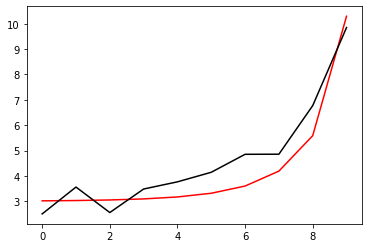

7437 0.007590937294307393 -0.9987933518744622
[2.5004574  3.55778982 2.55590935 3.48284381 3.76932576 4.15147213
 4.86747295 4.88262361 6.80727611 9.85378864]


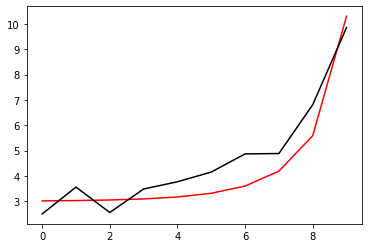

7638 0.011956674164194995 -0.9936592351648504
[2.49506278 3.55045566 2.55267007 3.47892392 3.76849279 4.1547644
 4.87709235 4.90209917 6.83454266 9.85505856]


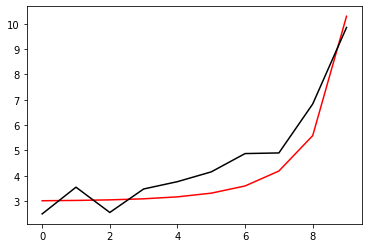

7839 0.007360245068974484 -0.9967813371233633
[2.49521757 3.5474719  2.55285006 3.47762626 3.76977238 4.15995976
 4.8888017  4.92430574 6.86551713 9.85644548]


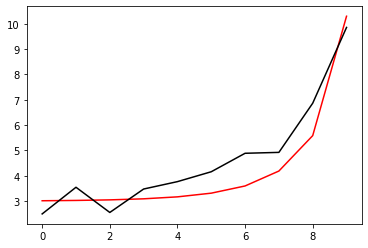

8040 0.011834259953509046 -0.9936456538135243
[2.49576834 3.54556379 2.55475385 3.47844145 3.7734453  4.16760857
 4.90267374 4.94783058 6.89616889 9.85787496]


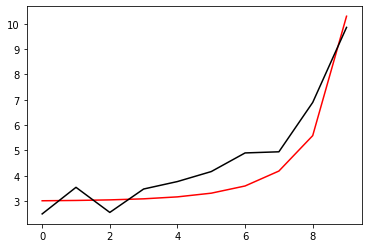

8241 0.04824704711850697 -0.9936874385565467
[2.4948571  3.54221533 2.55533937 3.47802352 3.77599514 4.17425576
 4.915692   4.97086127 6.92749826 9.85929743]


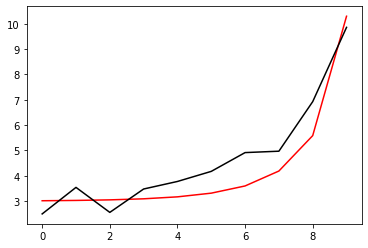

8442 0.026683967286713066 -0.9937584728716788
[2.49424506 3.53906415 2.55604087 3.47755247 3.77820686 4.1800786
 4.92706835 4.99120334 6.95579578 9.86057906]


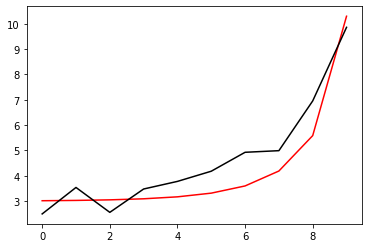

8643 0.036364892718875906 -0.9939061961562835
[2.49397478 3.53614612 2.55687981 3.47705125 3.78011553 4.18515234
 4.93696786 5.0091169  6.98119935 9.86173092]


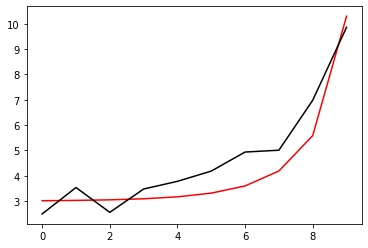

8844 0.03355602157433555 -0.9941474070995991
[2.49371348 3.53314796 2.55757412 3.47629221 3.78158818 4.18950489
 4.94568855 5.02526129 7.0045885  9.86279494]


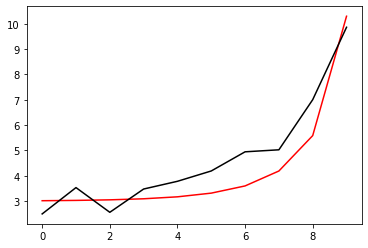

9045 0.01285357825660462 -0.9944668779640747
[2.49307334 3.52971748 2.55782386 3.47505211 3.78252359 4.19322762
 4.95362728 5.04044681 7.02711345 9.86382194]


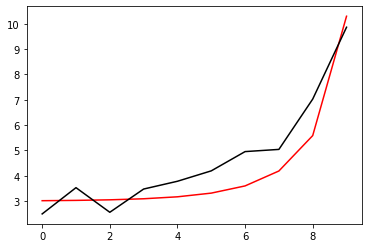

9246 0.9343393695923238 -0.99981400359866
[2.49268886 3.52581401 2.55707349 3.47240415 3.78180808 4.19522584
 4.96000008 5.05456916 7.04950871 9.86486049]


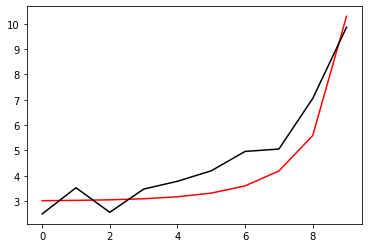

9447 0.0064831431558481905 -1.0033749097016906
[2.49743724 3.52689969 2.56097477 3.47428587 3.78560115 4.20196244
 4.97166787 5.07475626 7.07811717 9.86617328]


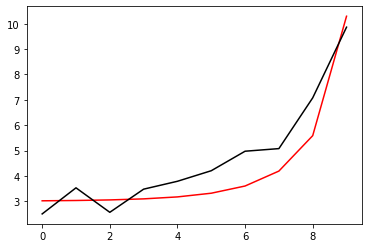

9648 0.01980148404839913 -0.9955544140200551
[2.49244326 3.51976512 2.55733012 3.46984138 3.78407642 4.20474581
 4.98156951 5.09648929 7.11075538 9.86765385]


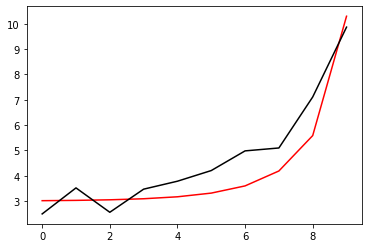

9849 0.010536810056989364 -0.9962537302030025
[2.49128201 3.51632297 2.55728089 3.46873928 3.78550562 4.20979005
 4.99244389 5.11710151 7.14029879 9.86901034]


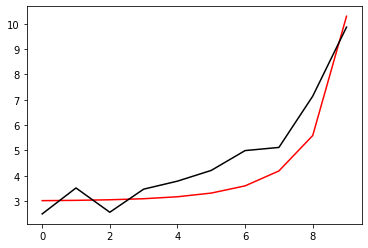

In [162]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.007949983746264953 -0.9989579845476831
[2.49334574 3.51437091 2.56278194 3.4722475  3.79412744 4.22549439
 5.01971125 5.16335383 7.19879417 9.87173292]


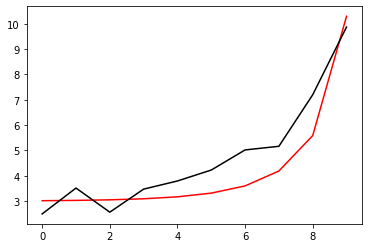

402 1.012823171916851 -0.9985741679464397
[2.49649653 3.51500358 2.56674001 3.47516154 3.79978549 4.23533569
 5.03643748 5.19064032 7.23345771 9.8733292 ]


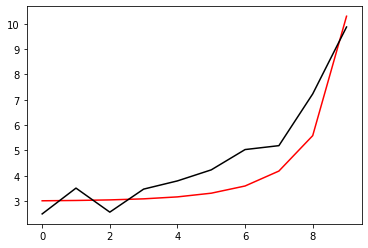

603 0.006632797469068572 -0.9992786548350235
[2.49165957 3.50781055 2.56301755 3.47061494 3.79830659 4.23862584
 5.04794308 5.21557596 7.26916148 9.87494653]


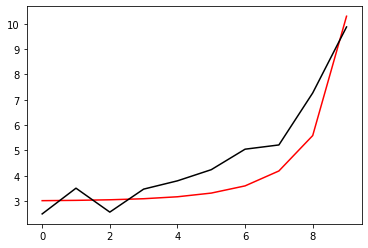

804 0.00679144215586768 -1.0028806380966409
[2.49377473 3.5069936  2.56483788 3.47099917 3.8010078  4.24522559
 5.06139494 5.23985181 7.30091206 9.87637959]


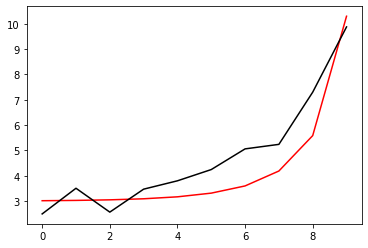

1005 0.007115715170891564 -1.0006933637515596
[2.48801304 3.49928031 2.56042596 3.46588326 3.79881623 4.24762565
 5.07192284 5.26383469 7.33406841 9.87788679]


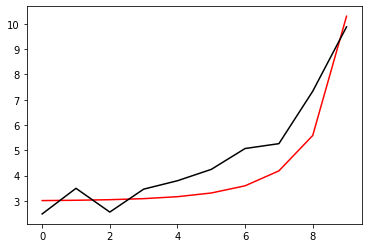

1206 0.006956305514558418 -1.0013997910966639
[2.4874156  3.49653779 2.56113829 3.46592617 3.80210951 4.25605795
 5.0891373  5.29460791 7.37379075 9.87969659]


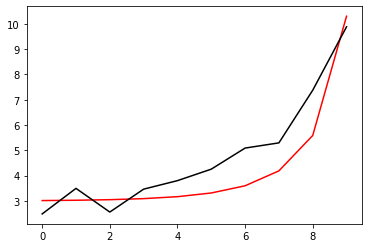

1407 1.0101269811074205 -0.9987974942319785
[2.48770722 3.49412433 2.56128182 3.46480231 3.8034293  4.26158762
 5.10231572 5.32022457 7.40767475 9.88123897]


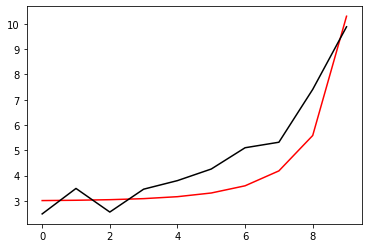

1608 0.009855133064800492 -1.0006718684293001
[2.4863165  3.49054141 2.56090043 3.46377408 3.8056481  4.26911802
 5.11910884 5.35143455 7.44872152 9.88312693]


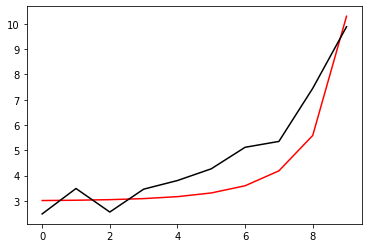

1809 0.006713094965430105 -1.0027363951176096
[2.4908004  3.49216612 2.56488856 3.46624448 3.81019422 4.27726075
 5.13362139 5.3759597  7.47955616 9.88454914]


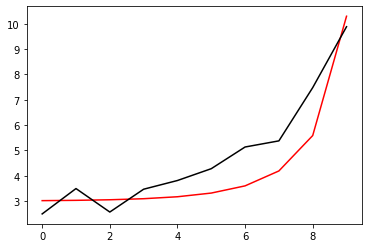

2010 1.009240161028842 -0.9990662908506085
[2.4847212  3.48428269 2.56020756 3.4611067  3.8082337  4.28041489
 5.14572556 5.40233385 7.51623125 9.88624658]


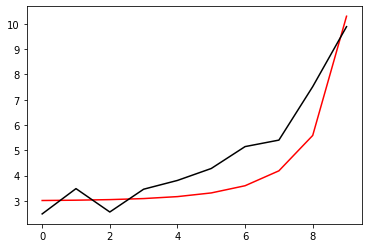

2211 0.008027508845718984 -1.000011895812082
[2.48503028 3.48216791 2.56083869 3.46073124 3.81053448 4.28721284
 5.16044324 5.42957245 7.55227113 9.88790727]


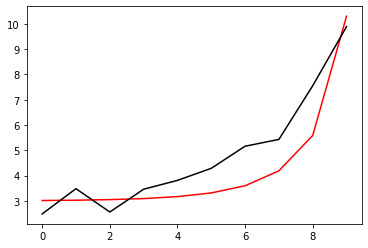

2412 0.012049260458007846 -0.9996630563785929
[2.48457233 3.47933488 2.56097529 3.45992448 3.81248246 4.29361298
 5.17445065 5.45553131 7.58708339 9.88950759]


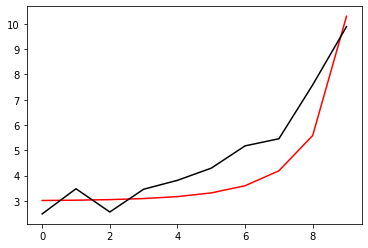

2613 0.011107387527251374 -0.9989506563359206
[2.48341557 3.47516327 2.55915618 3.45654391 3.81116124 4.29586594
 5.18312308 5.47492671 7.61511289 9.89078445]


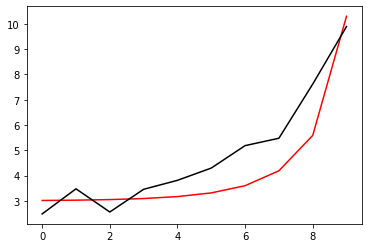

2814 0.011437105736601977 -0.9992089953052151
[2.48493611 3.47317873 2.55910645 3.45445412 3.8106614  4.29839046
 5.19134008 5.4929919  7.64118402 9.89196875]


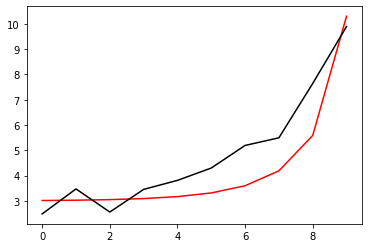

3015 0.011692460272897803 -0.9984654752316187
[2.48244964 3.46671839 2.5541742  3.44719049 3.80484271 4.29569815
 5.19498387 5.50807452 7.66619312 9.89311616]


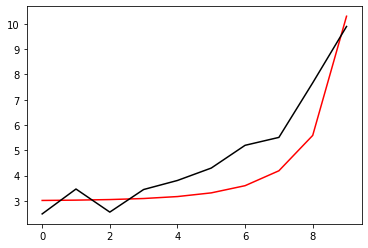

3216 0.010683633455055623 -0.9994197221855861
[2.48650087 3.46798595 2.55810221 3.44973262 3.80969177 4.30438168
 5.21021065 5.53349629 7.69866601 9.89459551]


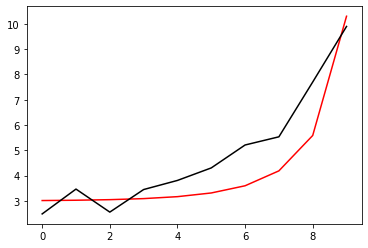

3417 0.09978550031762504 -1.000206584875123
[2.49061958 3.46799936 2.55930245 3.44832161 3.80932122 4.30660161
 5.21783848 5.55075605 7.72326694 9.89568446]


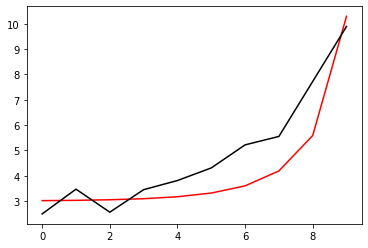

3618 0.11308974025320748 -0.998927514236278
[2.48640006 3.46036573 2.5531982  3.44002594 3.80225647 4.30226734
 5.21931643 5.56321724 7.74486759 9.89668508]


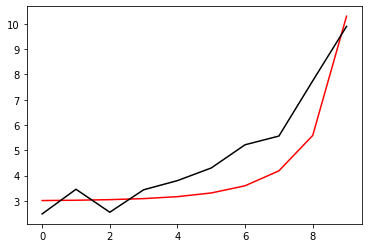

3819 1.0076796885046893 -0.9987303108312782
[2.48585179 3.45681937 2.55173747 3.43681097 3.80079883 4.30408954
 5.22731059 5.58173164 7.77144567 9.89789745]


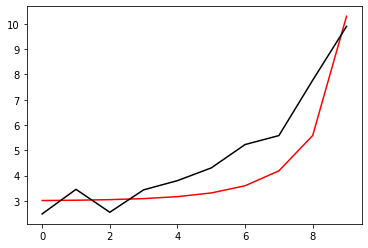

4020 0.01612455694944822 -0.999106306531301
[2.49453094 3.46232259 2.55918366 3.44233043 3.80787279 4.31406884
 5.24251311 5.60532323 7.80032774 9.89920522]


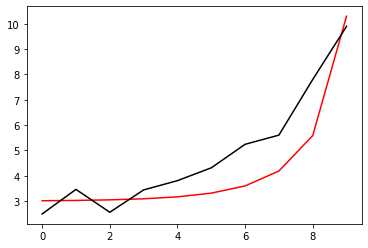

4221 0.010141443435753874 -0.9984123797906953
[2.48641191 3.45113835 2.55021248 3.43161556 3.79896582 4.30845399
 5.24312507 5.61711933 7.8223797  9.9002371 ]


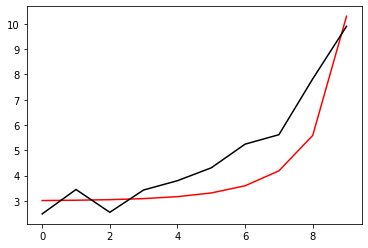

4422 0.0964586270069798 -0.9952216361358023
[2.48888609 3.4499318  2.55052335 3.42966353 3.79834205 4.31070823
 5.25107306 5.63506619 7.84840232 9.90145228]


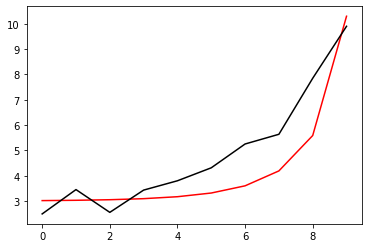

4623 0.005928832750786622 -0.9990678250298183
[2.48542167 3.44184873 2.54262282 3.41844991 3.78720954 4.30121667
 5.24640642 5.64094296 7.86438802 9.90218491]


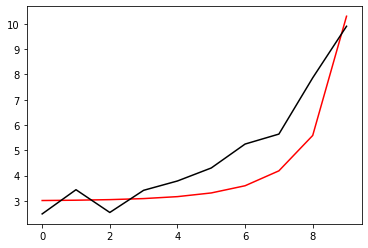

4824 1.0069181961063784 -0.9985217366989625
[2.49022044 3.4438108  2.54632931 3.42032064 3.79040854 4.30701819
 5.25713955 5.6599967  7.88874375 9.90330779]


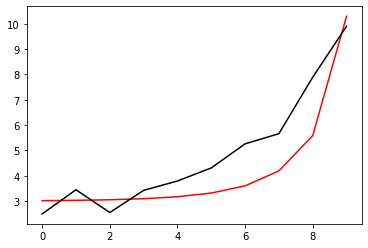

5025 1.0106745746517005 -0.9980535402286124
[2.49142109 3.44226883 2.5468159  3.41915385 3.79086425 4.31045529
 5.26607275 5.67826202 7.91408393 9.90447617]


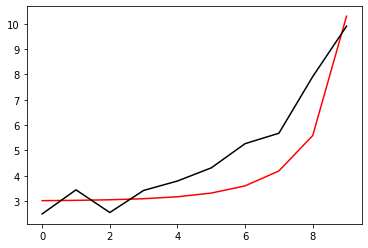

5226 1.2712573697602128 -0.995057527391597
[2.49522919 3.44282333 2.54901577 3.41937422 3.79249778 4.3149571
 5.27603582 5.69754088 7.94040998 9.90569861]


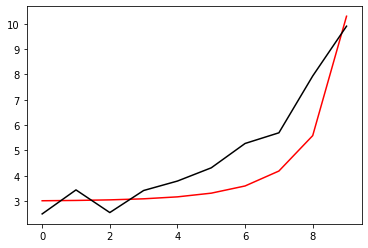

5427 0.049578866102031695 -0.9949479126166756
[2.49388513 3.43753908 2.54428218 3.41181543 3.78525488 4.30940412
 5.27496973 5.70597968 7.95722037 9.90646308]


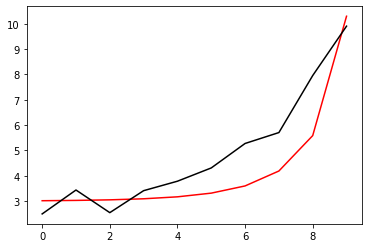

5628 0.008009788077737584 -0.9970156558001102
[2.49655325 3.43676417 2.54435004 3.40947988 3.78356766 4.30975834
 5.28009675 5.72026142 7.97809932 9.90741599]


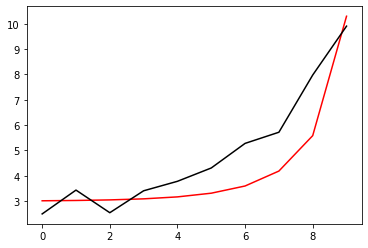

5829 0.17454773978416965 -0.9947966941886542
[2.50023284 3.43737991 2.54630326 3.40947008 3.78476536 4.31368221
 5.28957587 5.73927447 8.00317742 9.90856112]


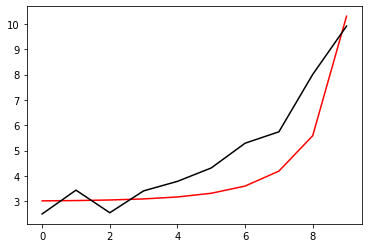

6030 0.00619335096680883 -1.001367033920161
[2.5077764  3.44136841 2.5509528  3.41143142 3.78692758 4.31710362
 5.29624895 5.75247778 8.0201726  9.90930475]


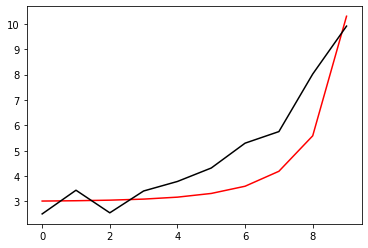

6231 0.04145938221913929 -0.9956637972694086
[2.50109596 3.43208634 2.54344862 3.40238224 3.77952075 4.31302765
 5.29903601 5.76759804 8.04420605 9.91041059]


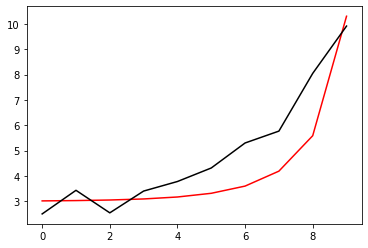

6432 0.01972994581026236 -0.9968336124155962
[2.50160251 3.42963803 2.54243494 3.39934539 3.77755398 4.31351578
 5.30473948 5.7827973  8.06565103 9.91134718]


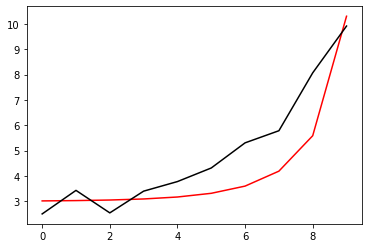

6633 0.024580427132287284 -0.9962610259693754
[2.50247297 3.42777857 2.54237648 3.3975271  3.77712783 4.31585962
 5.31248453 5.79997735 8.08949691 9.91245518]


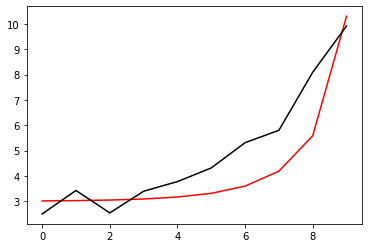

6834 0.013309906619219382 -0.998673888618564
[2.50746514 3.42916644 2.54480041 3.39742186 3.7776606  4.31828977
 5.31912378 5.81465502 8.11035609 9.91346458]


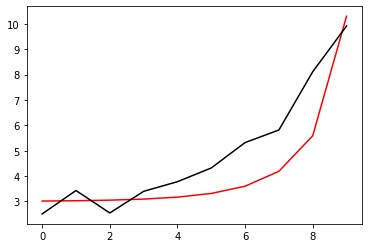

7035 1.0076224278775043 -0.99643541086592
[2.50627148 3.42523529 2.54252025 3.39333742 3.77479166 4.31791441
 5.32375629 5.82846807 8.13109662 9.91441234]


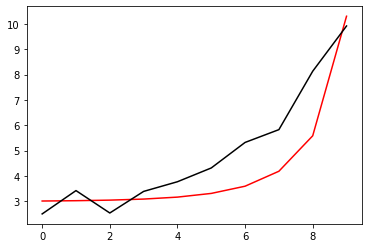

7236 0.007542354695729956 -1.0001128184791064
[2.51075188 3.42609446 2.54424153 3.3924519  3.77436111 4.31915078
 5.32892382 5.8415028  8.1504246  9.91526186]


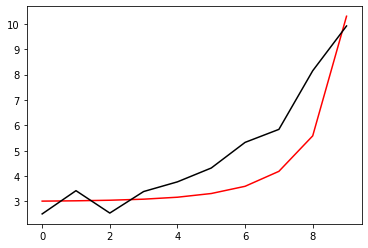

7437 0.0176744262483023 -0.9968286286411229
[2.50970253 3.42245163 2.54225428 3.38876349 3.7719111  4.31921006
 5.33400277 5.85576946 8.17149844 9.91629628]


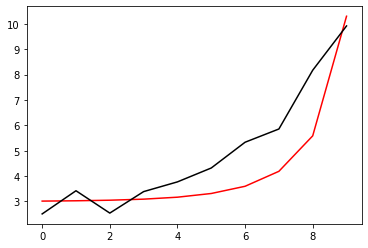

7638 0.0063015134923239 -1.0006700753613045
[2.5135839  3.42274448 2.54332052 3.38722157 3.7707573  4.31965775
 5.33836156 5.86814818 8.19034972 9.91707861]


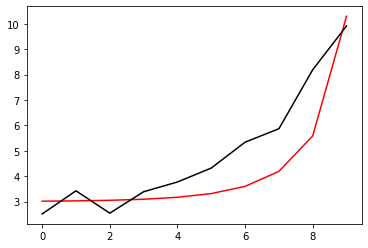

7839 0.005824337290950719 -1.0010094877706732
[2.5160413  3.42172455 2.54299167 3.3843454  3.76821503 4.31863566
 5.34121736 5.87923816 8.20791249 9.91788652]


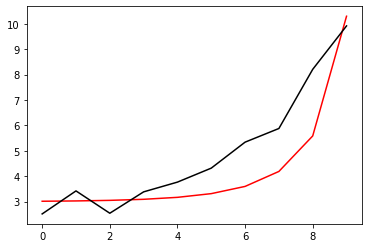

8040 0.01285664556248685 -0.9963845925893106
[2.51312538 3.41645206 2.53936997 3.37921928 3.76444815 4.31764084
 5.34593199 5.8945208  8.23067283 9.91899404]


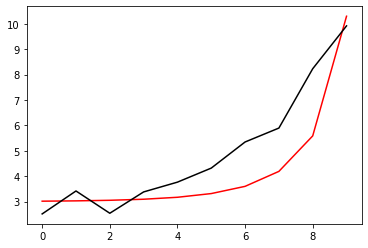

8241 0.03413937990558178 -0.9965955040949924
[2.51465381 3.41542428 2.53991159 3.37804699 3.76444997 4.32011809
 5.3534265  5.91117475 8.25384133 9.92003988]


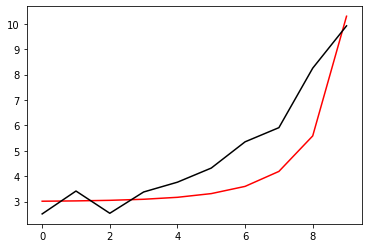

8442 0.013930952958572154 -0.9980865575639167
[2.51775787 3.41557526 2.54138662 3.37750112 3.76480953 4.32260899
 5.36036216 5.92646893 8.27559175 9.92101244]


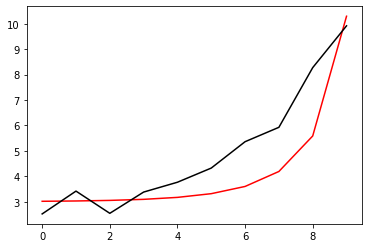

8643 0.006046134928053028 -1.0013452930910856
[2.51926841 3.41333184 2.53970671 3.37311552 3.76062446 4.31976706
 5.36107389 5.93500785 8.29120301 9.92173078]


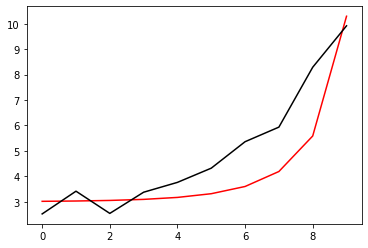

8844 0.0064431515389220045 -0.9998429636249131
[2.51830419 3.40860307 2.53527508 3.36579314 3.7531089  4.31303195
 5.35721711 5.93879149 8.3025713  9.92226763]


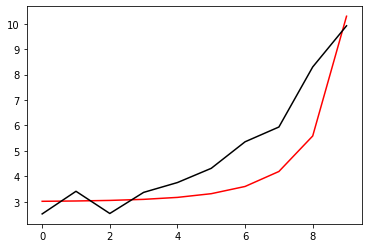

9045 0.011484561813712624 -0.9968365631915956
[2.52120096 3.40936267 2.53793331 3.36718289 3.7560892  4.31896039
 5.36860861 5.95922547 8.32845317 9.92342057]


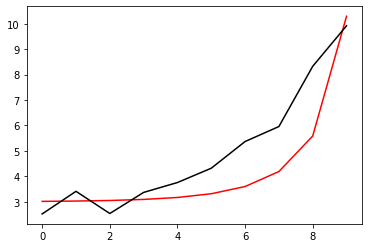

9246 0.5868903168933873 -0.9973463032626837
[2.52206003 3.40745586 2.53743588 3.36483548 3.75477444 4.31995714
 5.37436238 5.97385493 8.35010275 9.92439886]


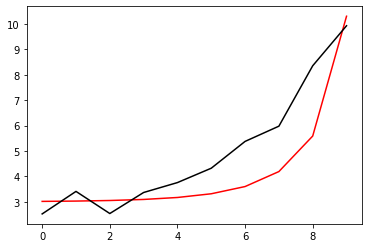

9447 0.0057183834443087864 -1.0001211522442055
[2.52592585 3.40814785 2.53925919 3.36448705 3.75515883 4.32226157
 5.38076074 5.98808955 8.37067071 9.92533571]


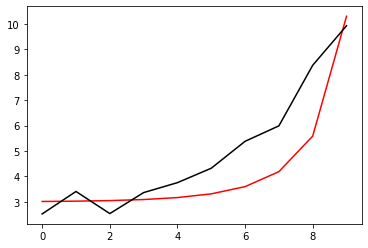

9648 0.0054693860452492285 -1.0034689853477508
[2.52779428 3.40594196 2.53713163 3.3591828  3.74936308 4.31682274
 5.37739809 5.99092071 8.38002759 9.92577258]


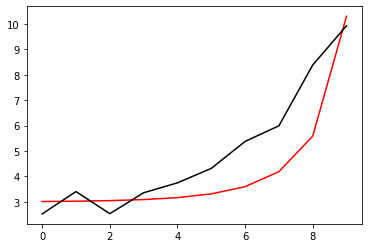

9849 0.0055735816392573365 -1.0024887229218544
[2.53038629 3.40517491 2.53695323 3.35653811 3.74698408 4.3158767
 5.38019449 6.00176505 8.39727052 9.92657352]


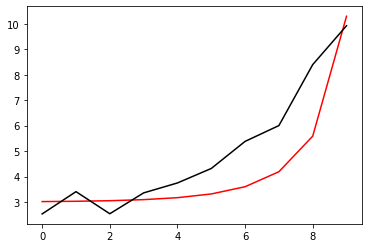

In [163]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.007604224392523554 -0.9991400753552788
[2.52724608 3.3985247  2.5344433  3.35203111 3.7457896  4.32076433
 5.39758698 6.04375039 8.44077943 9.92859291]


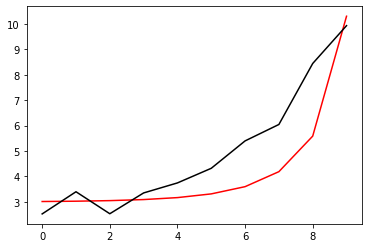

402 1.010489616487014 -0.9993645624683802
[2.52870948 3.39757144 2.5346872  3.35062475 3.74516948 4.32195783
 5.40266009 6.05696328 8.46175546 9.92955153]


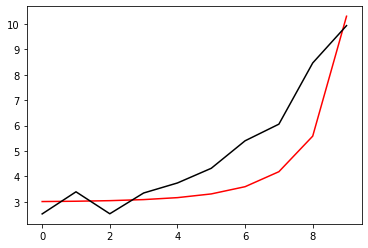

603 0.00535289695079573 -1.0025521562399695
[2.53398146 3.39973642 2.53775118 3.35142279 3.74626274 4.32416811
 5.40754263 6.0678714  8.47779178 9.93030247]


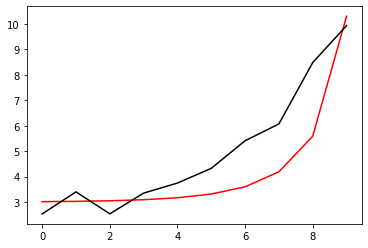

804 0.010092436492811333 -0.9996189110739079
[2.53169053 3.39460205 2.53411756 3.34596418 3.7418353  4.32190158
 5.40964492 6.07870164 8.49659752 9.93114864]


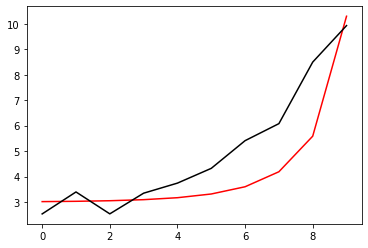

1005 0.00579164397656814 -1.0025783676823152
[2.53650659 3.39603523 2.53664316 3.34601418 3.74226643 4.32361237
 5.41432431 6.08991268 8.51307957 9.93188427]


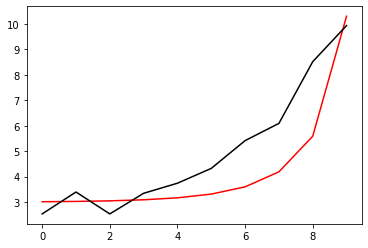

1206 0.0071962049381743606 -1.001377137767773
[2.54010468 3.39646775 2.53853135 3.34570373 3.74270609 4.32575702
 5.41996341 6.10271757 8.53157343 9.93271431]


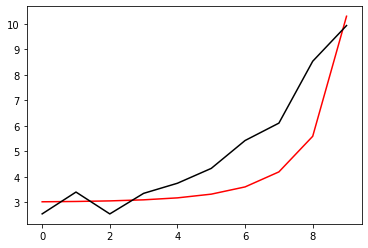

1407 1.006976348656307 -1.001837497416135
[2.54516306 3.39788005 2.54036539 3.34457839 3.74121041 4.32458098
 5.42048349 6.10850278 8.54201503 9.93319079]


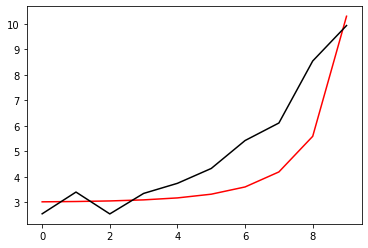

1608 0.006849592117197219 -0.9993004044522464
[2.53724611 3.3869206  2.53061243 3.33276524 3.73029779 4.31600464
 5.41722891 6.11634746 8.56049211 9.93406641]


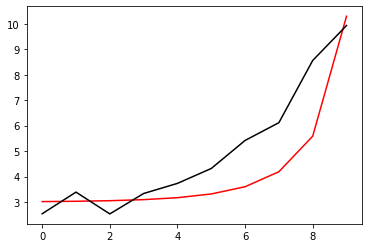

1809 0.007782642702753052 -1.0000770572186597
[2.5422896  3.38903401 2.5340666  3.33417517 3.73251158 4.32014383
 5.42533342 6.13208086 8.58224275 9.9350661 ]


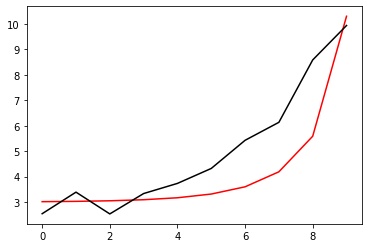

2010 1.0076762821489598 -0.9992494244155437
[2.53912737 3.38275669 2.52912406 3.32716421 3.72630593 4.31582222
 5.42498498 6.13995272 8.59786352 9.93578336]


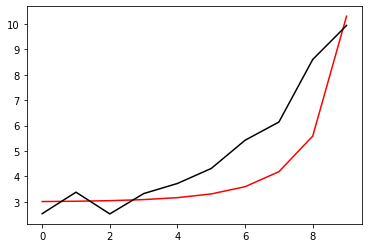

2211 0.007010654606804065 -1.0013075357501884
[2.5499559  3.39055582 2.53826464 3.33413354 3.7338639  4.32480232
 5.43678195 6.15722669 8.61861948 9.93674855]


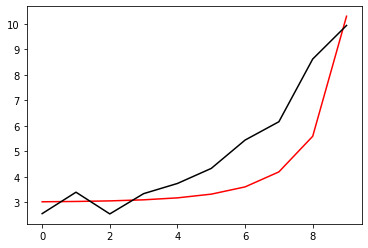

2412 0.010035002745199553 -0.999614438138409
[2.54375844 3.38094197 2.529781   3.32335292 3.72368851 4.31630918
 5.43211936 6.16105388 8.63126539 9.93731516]


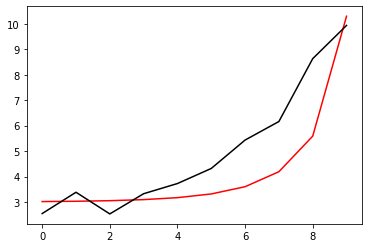

2613 0.006758493719982696 -1.002622245577832
[2.55442937 3.38799702 2.53740884 3.32803219 3.72792085 4.3205252
 5.43703112 6.16897225 8.641343   9.93779254]


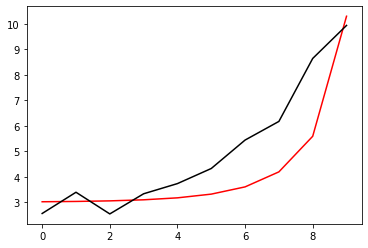

2814 0.008193617126033836 -1.0003714497735348
[2.55210108 3.38213174 2.53183785 3.31971674 3.71938306 4.31267899
 5.43182562 6.17114629 8.65116623 9.93823328]


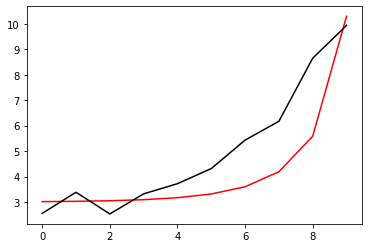

3015 0.008736505651415219 -0.9996196770422211
[2.55053731 3.37768644 2.52837138 3.31415264 3.71434295 4.30926844
 5.43228826 6.18002474 8.66723473 9.93895822]


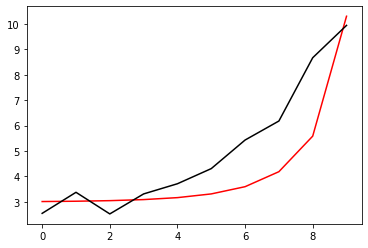

3216 0.008243688627108274 -0.9994771116429644
[2.55015828 3.3746381  2.52661663 3.31053049 3.71155632 4.30851037
 5.43589072 6.19240888 8.68713449 9.93986878]


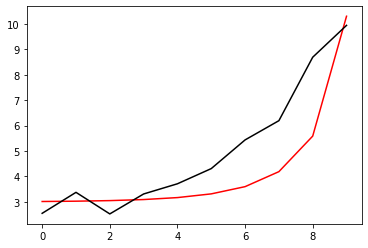

3417 0.00821390560393202 -0.9997077925399704
[2.55184707 3.37359739 2.52691928 3.30895086 3.71079383 4.30965966
 5.44100534 6.20541079 8.7069668  9.9407765 ]


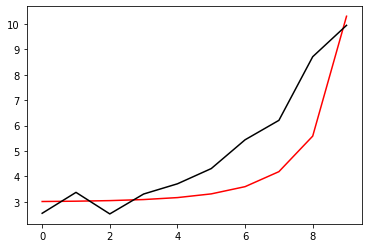

3618 0.10455626276912838 -0.9999595843964755
[2.55807484 3.37691236 2.53146352 3.31145045 3.71392339 4.31438723
 5.44904853 6.22008248 8.72707037 9.94167988]


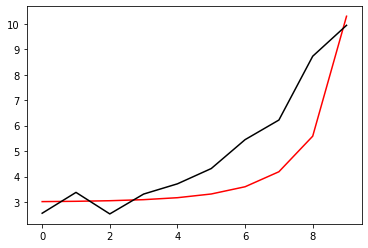

3819 1.0026738254049548 -1.0006299643096468
[2.56115799 3.37647805 2.53133444 3.3084875  3.71040898 4.31075585
 5.44615772 6.22087943 8.73174788 9.94187527]


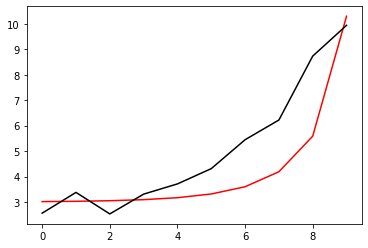

4020 0.008163801091788804 -0.9993866934295482
[2.5563252  3.3688856  2.52494297 3.30022869 3.70292919 4.30521381
 5.44486572 6.22857648 8.74838543 9.94266848]


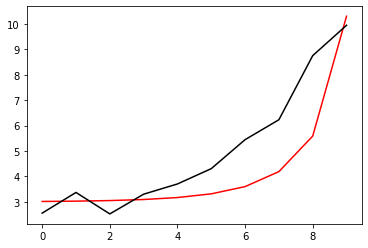

4221 0.007772215165902908 -0.9993605039618625
[2.55823975 3.36807309 2.52542442 3.29884038 3.70229051 4.30635088
 5.44968376 6.24084965 8.76744208 9.94353959]


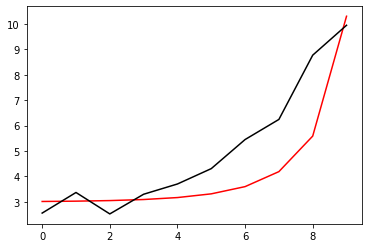

4422 0.015731370687160205 -0.9977767128412374
[2.56563875 3.37263324 2.53123672 3.30267796 3.70674381 4.31230081
 5.45866018 6.2559043  8.78742429 9.94444015]


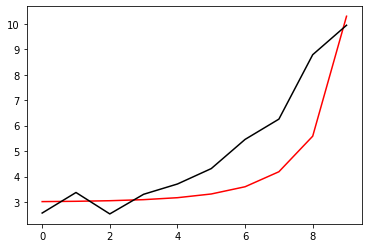

4623 0.0054889154735077595 -0.9991667658173401
[2.57045454 3.37398794 2.53292488 3.30154431 3.7050097  4.31030924
 5.45705389 6.257236   8.79165155 9.94466009]


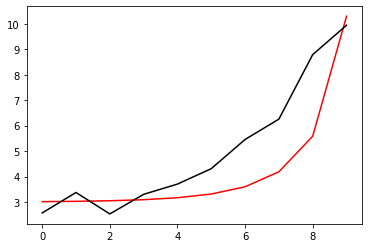

4824 1.0054828303336198 -0.9992816389935101
[2.5628272  3.36347482 2.52351578 3.29014553 3.69424316 4.3012782
 5.45200286 6.26106782 8.80501912 9.9452699 ]


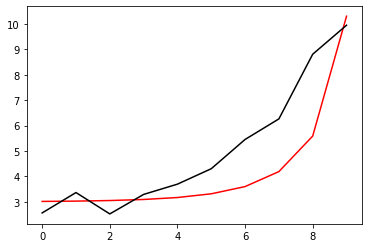

5025 1.008181470313708 -0.9990412531860461
[2.56500026 3.36288309 2.52418566 3.28890653 3.69369758 4.30242442
 5.45667864 6.27299805 8.82369794 9.94612913]


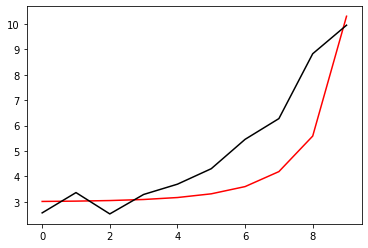

5226 1.3674873090223258 -0.9953380519554951
[2.5735926  3.36861629 2.53113623 3.29385583 3.69917693 4.30921805
 5.46611466 6.28789107 8.84292971 9.94706534]


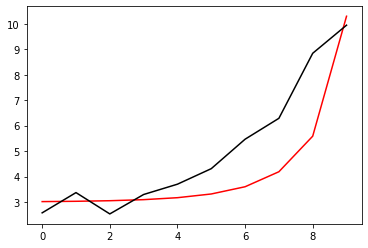

5427 0.11610629873643544 -0.9956466402959948
[2.57644126 3.36741175 2.52958381 3.2890374  3.69338826 4.30306233
 5.4607335  6.28664295 8.84647251 9.94731381]


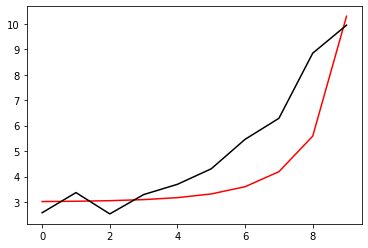

5628 0.015840433106580978 -0.9960861604283957
[2.574743   3.36281745 2.52564753 3.28287311 3.68720101 4.29750143
 5.45712462 6.28859824 8.85458541 9.94756124]


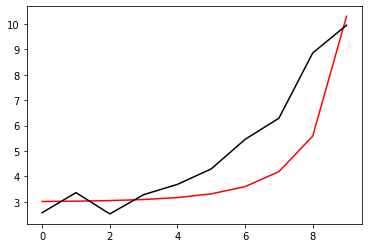

5829 0.3485004205105201 -0.9987270687990293
[2.57315457 3.35834321 2.52195075 3.27702153 3.68149528 4.2926769
 5.45462314 6.29206075 8.86433552 9.94795864]


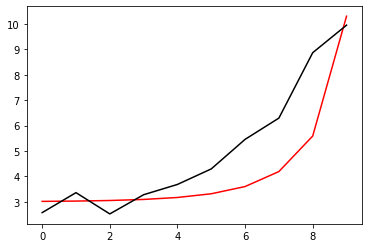

6030 0.006823735596308262 -0.9982047136691747
[2.57434069 3.35705072 2.52194341 3.27529683 3.68050128 4.29337704
 5.45881777 6.30350156 8.8827312  9.94877939]


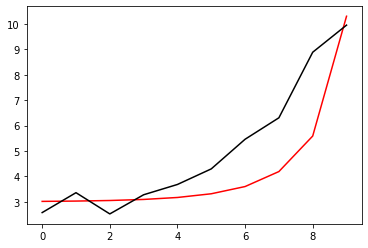

6231 0.009116943480650813 -0.9975995929940484
[2.57612296 3.35621698 2.52237668 3.27393466 3.67982152 4.29431009
 5.46306974 6.31467712 8.90073341 9.94959426]


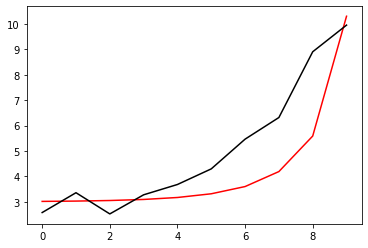

6432 0.03060509029061983 -0.9967649996017999
[2.5781818  3.35544538 2.52277071 3.27240058 3.67887202 4.29485864
 5.466762   6.32503921 8.91787225 9.95040209]


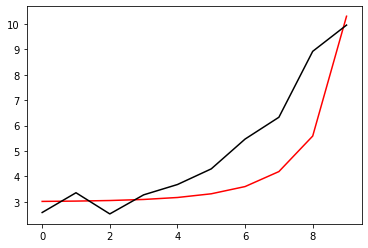

6633 0.008771306080622904 -0.9989318447899573
[2.58381205 3.35736838 2.52485829 3.27157035 3.67740364 4.29322458
 5.46577371 6.32740869 8.9241029  9.9507549 ]


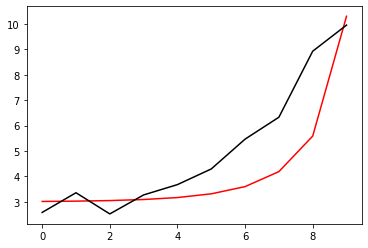

6834 0.047798451843909136 -0.9976879257799657
[2.59116644 3.36191791 2.53000482 3.27444383 3.68006744 4.29612734
 5.46968621 6.33465906 8.93376072 9.95115308]


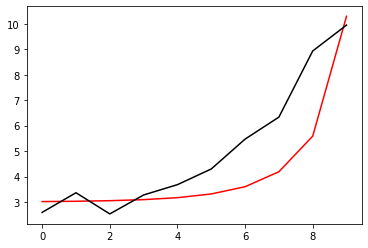

7035 1.007013630377686 -0.9969953100609035
[2.58451649 3.35259439 2.52160108 3.26409008 3.67015407 4.28768726
 5.46485269 6.33829961 8.94661777 9.95176154]


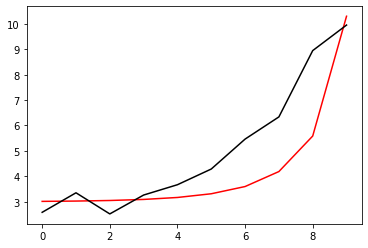

7236 0.021998958560304198 -0.9967867011280249
[2.58593328 3.3515632  2.52179849 3.26253649 3.66922905 4.28830438
 5.46872441 6.34909187 8.96391577 9.95257648]


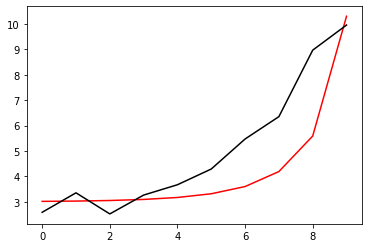

7437 0.0197079335930374 -0.9966809540333572
[2.58770282 3.35073862 2.52218154 3.26108873 3.66836385 4.28890605
 5.47241774 6.35941507 8.98072319 9.95336288]


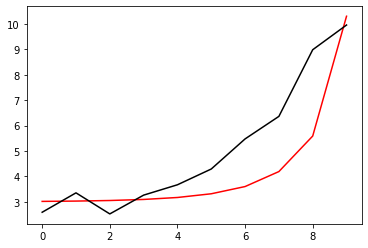

7638 0.01288200247216073 -0.996814873394757
[2.58992137 3.35018298 2.52276558 3.25973243 3.66750965 4.28941344
 5.47583669 6.3691788  8.99690261 9.95411074]


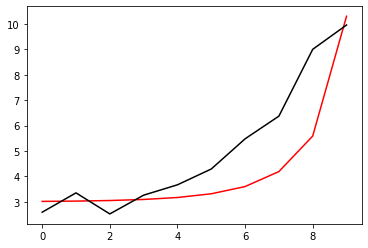

7839 0.006199911219084426 -0.9983311728906243
[2.59207826 3.34923944 2.52274975 3.25755006 3.66563136 4.2886668
 5.47768383 6.37696477 9.01094397 9.95472944]


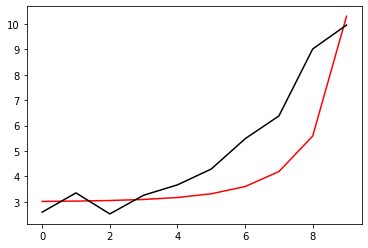

8040 0.011172402089091264 -0.9975616256347414
[2.59495641 3.34906388 2.52337497 3.25582559 3.66375532 4.28702915
 5.47696311 6.379603   9.01706382 9.95499642]


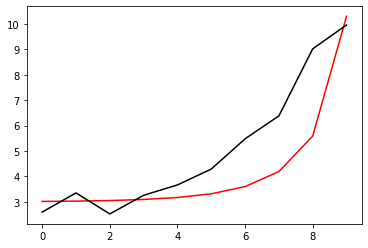

8241 0.03993234423121436 -0.9966781199672107
[2.59473411 3.34632612 2.52192453 3.25259864 3.66112714 4.28582815
 5.47873865 6.38793036 9.03207868 9.95568566]


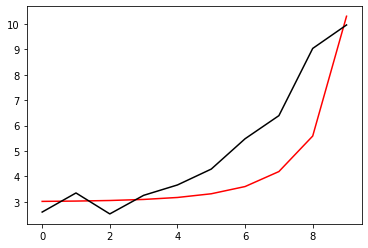

8442 0.021314339769088864 -0.9971572588633907
[2.59720064 3.34595317 2.52261701 3.25127485 3.66020944 4.28614838
 5.48178661 6.39710775 9.04756959 9.95637654]


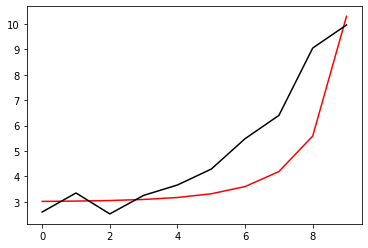

8643 0.005204971571178725 -1.0014069675176658
[2.60052092 3.3459058  2.52321865 3.24943875 3.65836562 4.28504294
 5.48270323 6.40319533 9.05920637 9.95689177]


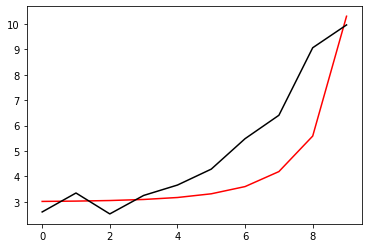

8844 0.004584615468136228 -1.0042275923073594
[2.60420098 3.3460838  2.52389133 3.24743631 3.65595347 4.28262505
 5.480939   6.40452338 9.06393505 9.95715059]


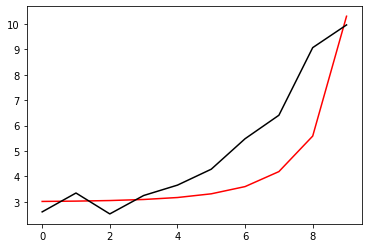

9045 0.004684262493126336 -1.0023762919826755
[2.60509421 3.3441178  2.52287428 3.24427268 3.65283651 4.27999421
 5.47958482 6.4071221  9.07064446 9.95742298]


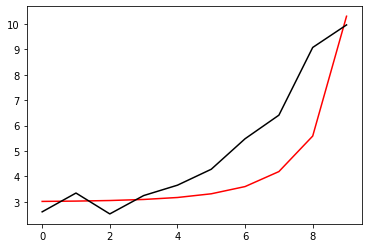

9246 0.2355997168086677 -0.9973625569806884
[2.60305443 3.33986066 2.52025006 3.24014301 3.64952576 4.27820563
 5.48064447 6.41439527 9.08429794 9.95802912]


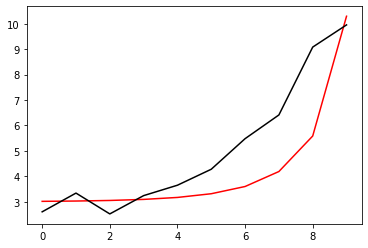

9447 0.006348757143549364 -0.9979125865181326
[2.60554467 3.33949487 2.52096044 3.23881128 3.64859736 4.27852675
 5.4837204  6.42372803 9.10023536 9.95875721]


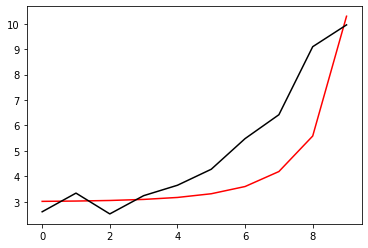

9648 0.006653487497456378 -0.9997758260595849
[2.60785293 3.33869654 2.52108422 3.23672716 3.64675362 4.27770964
 5.48529629 6.43100701 9.11371254 9.95938791]


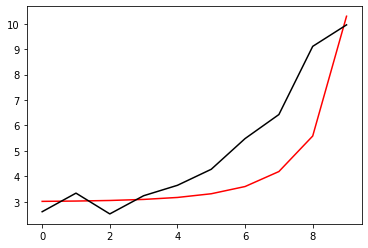

9849 0.004552988479309196 -1.005635052455793
[2.6098471  3.33672674 2.51925036 3.23182445 3.64111783 4.27179077
 5.47984561 6.42881243 9.11575073 9.95946765]


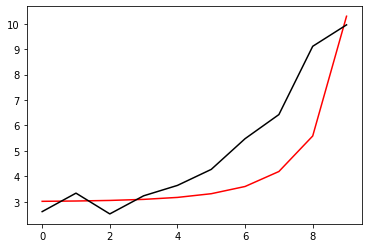

In [164]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.00504852382569612 -1.0015062062655455
[2.61653061 3.33792513 2.52629282 3.23410949 3.64481739 4.27718059
 5.48765459 6.44626623 9.1419143  9.96074318]


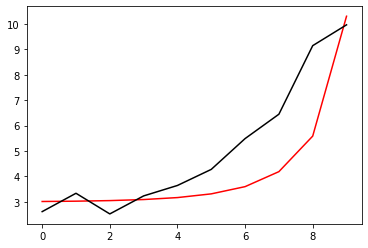

402 1.0087541371351691 -0.999076874166116
[2.61150351 3.33000725 2.5189886  3.22453555 3.63519795 4.26828672
 5.48112476 6.44692656 9.15106745 9.96112418]


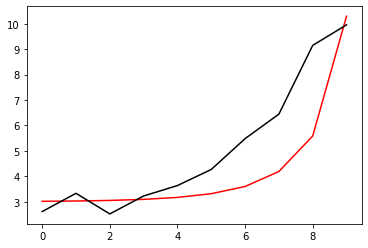

603 0.004725900183403286 -0.9992666216874466
[2.61311729 3.32900683 2.51921183 3.22284238 3.63396264 4.26831214
 5.48388704 6.45604734 9.16672137 9.96184314]


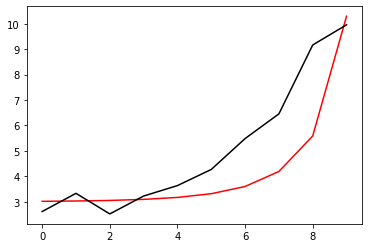

804 0.008388495717209779 -0.9994864041724387
[2.61511794 3.32816616 2.51955086 3.22118896 3.63272151 4.2682482
 5.48634466 6.46433274 9.18135072 9.9625094 ]


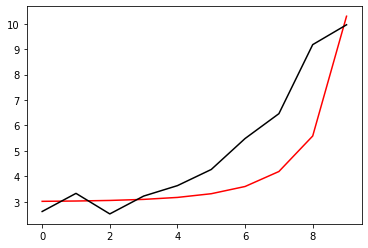

1005 0.006888999884043914 -1.0002098247418625
[2.62040205 3.33033924 2.52271885 3.22215761 3.63387724 4.27026056
 5.49032705 6.47316602 9.19538708 9.96314547]


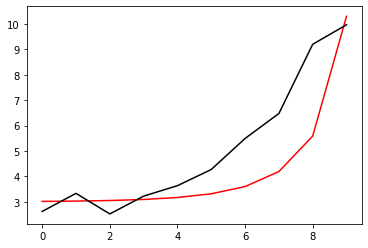

1206 0.004923983265786191 -1.0026263682617247
[2.62669461 3.33326008 2.5260792  3.22275207 3.63373091 4.26947966
 5.48898841 6.47296816 9.19655898 9.9631757 ]


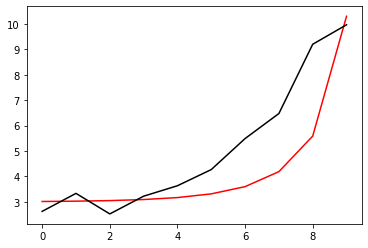

1407 1.007158490707961 -0.9992881346409755
[2.61996845 3.32406735 2.51809193 3.21309383 3.6247348  4.2620921
 5.48503046 6.47674573 9.20912291 9.96377411]


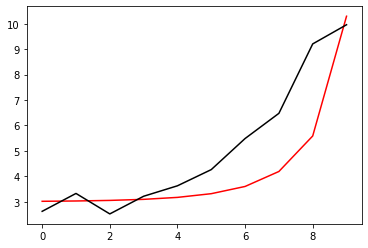

1608 0.005570317669104302 -0.9994190147274694
[2.62158071 3.32311876 2.51831405 3.21146994 3.62353928 4.26207631
 5.48752522 6.48500902 9.2234568  9.96443372]


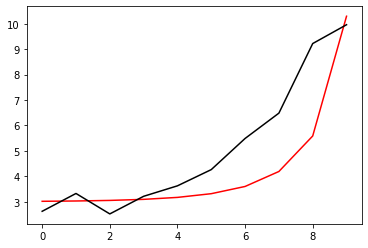

1809 0.0062607974637599725 -0.9995346577412493
[2.62309888 3.32194389 2.51829074 3.2095472  3.62201736 4.26169045
 5.48955468 6.49262005 9.23715564 9.96506371]


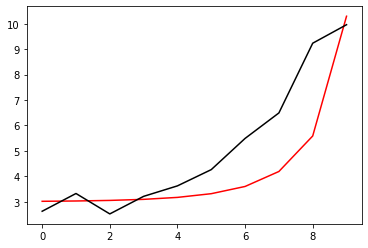

2010 1.0061099154229434 -0.9997245069365457
[2.62508577 3.32109759 2.51854234 3.20782494 3.62063722 4.26136853
 5.49151263 6.49991788 9.25039249 9.96567104]


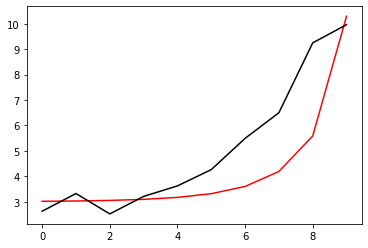

2211 0.0056819087709338795 -1.0001626907350145
[2.62866104 3.3216637  2.52009865 3.20727947 3.62030697 4.26192244
 5.49405766 6.50731881 9.26317782 9.96625599]


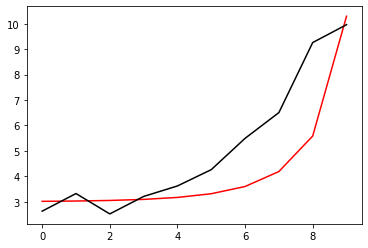

2412 0.009759580132158788 -1.000799491988557
[2.63696159 3.3270128  2.5265743  3.21160882 3.62470014 4.26674134
 5.4998302  6.51606915 9.27459932 9.96680018]


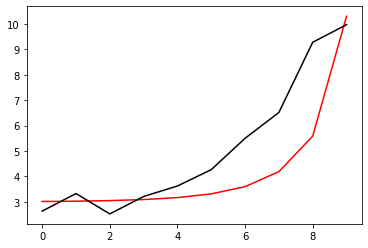

2613 0.005598938719337248 -0.9993706406094091
[2.62928842 3.3160862  2.5161884  3.19878811 3.61161661 4.25390389
 5.48816055 6.50872145 9.2730395  9.96670557]


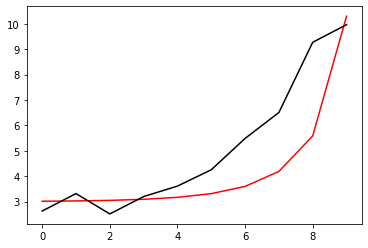

2814 0.006406565550767926 -0.9996212584881897
[2.63174092 3.31593577 2.51719312 3.19790506 3.61110222 4.25446723
 5.49102431 6.51698678 9.2870668  9.96734672]


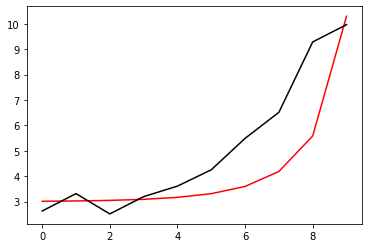

3015 0.0067980108804457755 -0.9997248539369179
[2.63328728 3.31476361 2.51714922 3.19593603 3.60948909 4.25392331
 5.49276928 6.52412033 9.3001908  9.96794726]


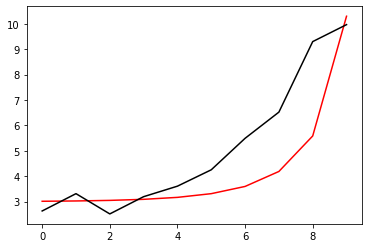

3216 0.006547735268871918 -0.9998901903358695
[2.63522456 3.3138685  2.51733344 3.19413678 3.6079954  4.25343175
 5.49445034 6.53097852 9.31289234 9.96852901]


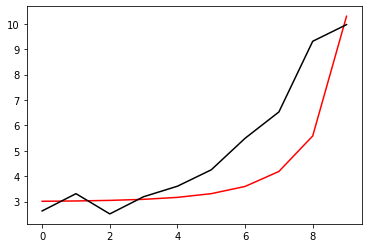

3417 0.004773933410747022 -1.0002210820468207
[2.63823999 3.31390653 2.51836086 3.19308321 3.60715212 4.25346565
 5.496455   6.53782139 9.32520842 9.96909335]


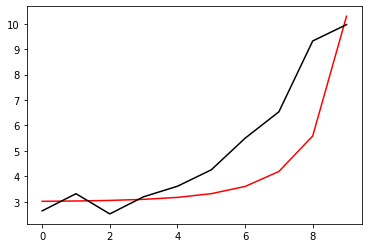

3618 0.05405520850872177 -1.000014681505074
[2.64059753 3.31335226 2.51894778 3.19166389 3.60602008 4.2532322
 5.49811736 6.54413203 9.33673173 9.96961279]


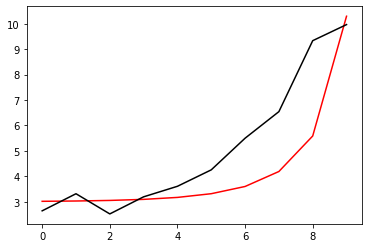

3819 0.9416113003310457 -1.001315755501703
[2.63719802 3.30654269 2.5127864  3.1830568  3.59717709 4.24457885
 5.49033474 6.53979189 9.33674434 9.96959145]


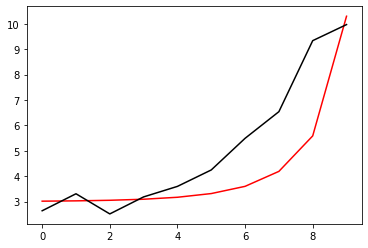

4020 0.004760420346205322 -0.999867752004012
[2.6363592  3.30235766 2.50890864 3.17670683 3.59048173 4.23810478
 5.48500392 6.53851169 9.34069984 9.96977969]


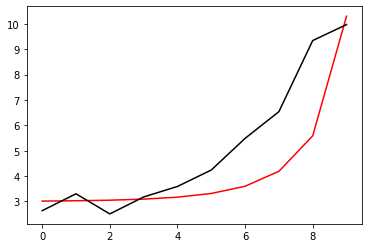

4221 0.006026482299394171 -0.9993637071906758
[2.64406404 3.3075584  2.51492937 3.18075495 3.59444011 4.24232631
 5.49001428 6.54636265 9.35113055 9.97027659]


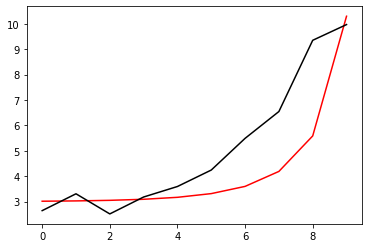

4422 0.005004469969214442 -0.9995294175685402
[2.64581316 3.30692138 2.51535883 3.17942863 3.59343558 4.24230977
 5.49214779 6.5537516  9.36450215 9.97089137]


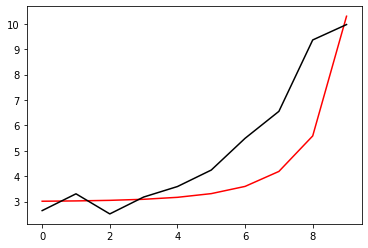

4623 0.004097980864066861 -0.9995242820099666
[2.64712731 3.30574938 2.51525811 3.17753509 3.5918612  4.24171885
 5.4936818  6.56045734 9.37720966 9.97147469]


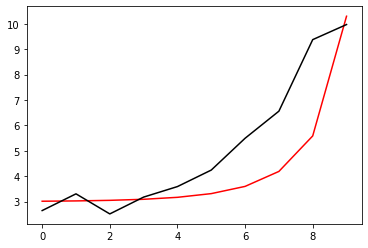

4824 1.0044639900856394 -0.9995032759091057
[2.64850115 3.30454139 2.51511567 3.17555807 3.59018683 4.2410031
 5.49503337 6.56684373 9.38949165 9.97203882]


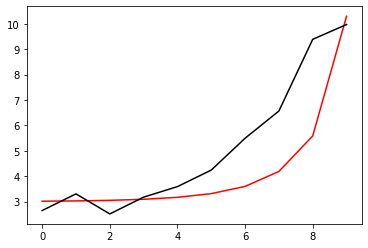

5025 1.0058822013974609 -0.9994493582351042
[2.65007237 3.30343269 2.51505191 3.17361318 3.58851991 4.24026468
 5.49630572 6.57302883 9.40146586 9.97258918]


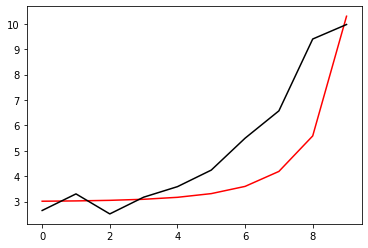

5226 2.002243642014387 -0.9992451567206099
[2.65203092 3.30260369 2.51522717 3.17185022 3.58699784 4.23963074
 5.49761907 6.57913361 9.41323707 9.97313109]


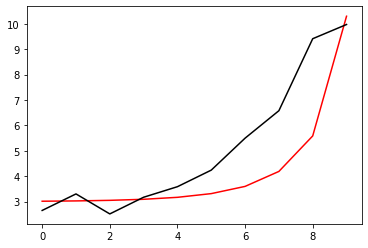

5427 0.00732369037534188 -0.9989004833250055
[2.65388735 3.30161506 2.51525436 3.16992107 3.58530959 4.23882007
 5.49871554 6.58493058 9.42459218 9.97365386]


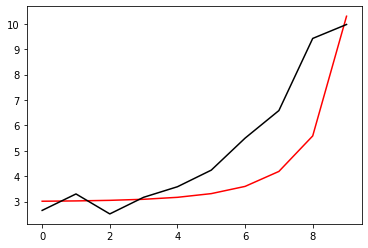

5628 0.004489182167003579 -0.9986606119692764
[2.65529598 3.30020718 2.51497033 3.16771723 3.58339525 4.23779718
 5.49955197 6.5903448  9.43537222 9.97414761]


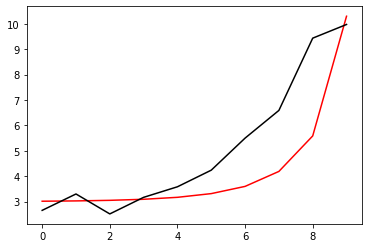

5829 0.1221882970720824 -0.995472692365045
[2.65950707 3.30145825 2.51728289 3.1679746  3.58380841 4.23888334
 5.50210869 6.59687678 9.44644049 9.97473592]


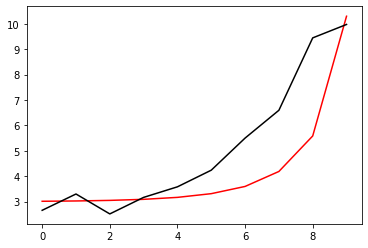

6030 0.005450481417550404 -0.9983329821843944
[2.65898452 3.29789047 2.51417078 3.16235343 3.57754378 4.23214565
 5.49511533 6.59154687 9.44316324 9.97444389]


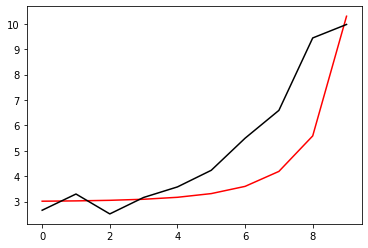

6231 0.006859819665281543 -0.9977928482808741
[2.66140276 3.29784583 2.51523228 3.1616129  3.57710695 4.23265681
 5.49764371 6.5989615  9.45598792 9.97502186]


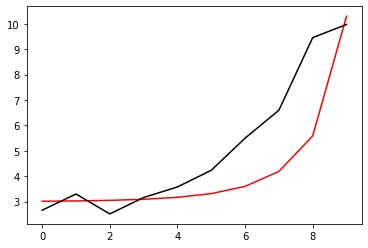

6432 0.015196750227391361 -0.9972588234033022
[2.6632413  3.29713175 2.51561303 3.16016098 3.5759461  4.23242588
 5.49939335 6.60553212 9.46804473 9.97557831]


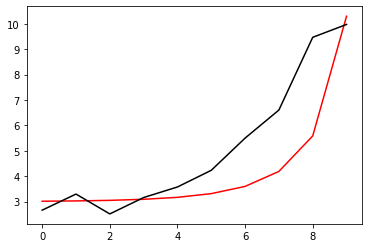

6633 0.020068511440944962 -0.9967617038813159
[2.66504535 3.29630521 2.51586941 3.15855495 3.57461317 4.2319948
 5.50088591 6.61173512 9.47968566 9.97612773]


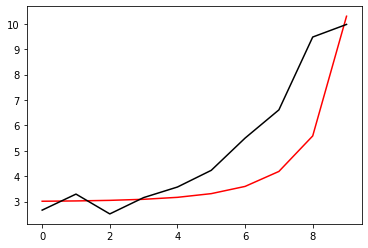

6834 0.07988909616459347 -0.9964910207042558
[2.66698799 3.29552209 2.51613252 3.15690852 3.57320366 4.23144299
 5.50218719 6.61762622 9.49093292 9.97666965]


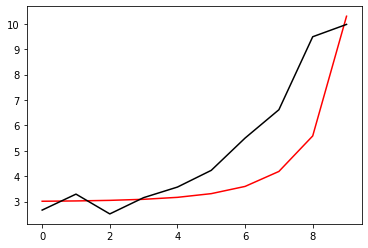

7035 1.0034031318962677 -0.9963039797322654
[2.66905663 3.29478764 2.51641468 3.15524651 3.57175313 4.23082092
 5.50337176 6.62331804 9.50192839 9.97720093]


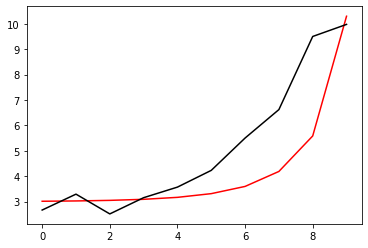

7236 0.027837157445987238 -0.9962800291328139
[2.67126828 3.2941135  2.51671374 3.15355976 3.57024442 4.23010577
 5.50441478 6.62878975 9.51264746 9.97771639]


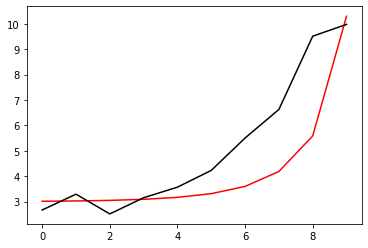

7437 0.02173848921427106 -0.9964022191823942
[2.67345807 3.29334954 2.51688795 3.15171616 3.56855464 4.22918567
 5.50522001 6.6339704  9.52304077 9.9782074 ]


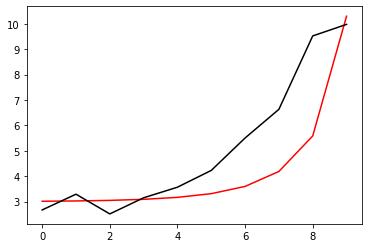

7638 0.012054104486700672 -0.996606712528688
[2.67540157 3.29231742 2.51680311 3.14961304 3.56661103 4.22801358
 5.50576319 6.63886061 9.53311889 9.97867003]


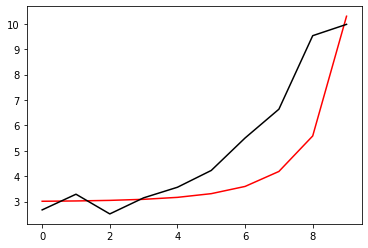

7839 0.007845649490683062 -0.9968389994185565
[2.67719243 3.29113851 2.51661149 3.14741703 3.56459452 4.22677857
 5.50623328 6.64364319 9.54303496 9.97911416]


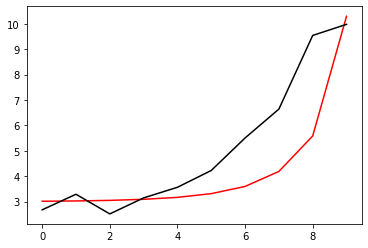

8040 0.010425688928451676 -0.9971059103991435
[2.67892431 3.28990798 2.51641513 3.14522664 3.56260242 4.22557409
 5.50671588 6.6483955  9.55284787 9.9795473 ]


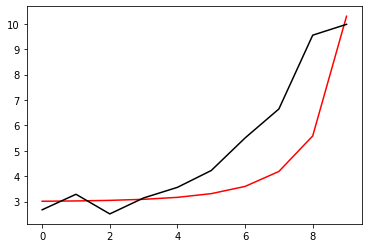

8241 0.01991723110527472 -0.9975833983254707
[2.68138828 3.28936788 2.51691338 3.1436929  3.56123829 4.2249474
 5.50768128 6.65348022 9.56277043 9.9799849 ]


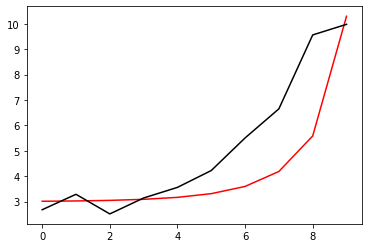

8442 0.004559565155108029 -1.006740679507148
[2.68451068 3.28838647 2.51589842 3.1395845  3.55616685 4.21924063
 5.50170992 6.64928056 9.56117708 9.97992958]


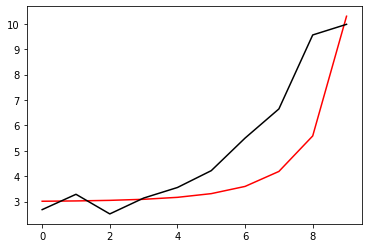

8643 0.025532899132288 -0.9961730578513058
[2.68321166 3.28545121 2.51468205 3.13714006 3.554294   4.21823276
 5.50205027 6.65304131 9.56835522 9.98022737]


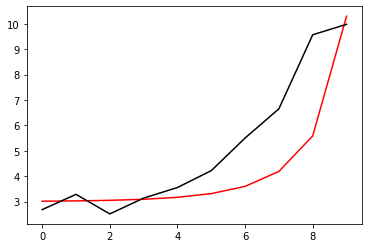

8844 0.028609802322960984 -0.9964111974827365
[2.68497064 3.28473701 2.51497118 3.13561649 3.55297109 4.21770592
 5.5032677  6.65867503 9.5789762  9.98070918]


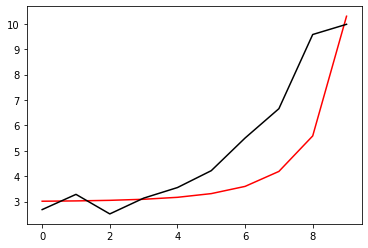

9045 0.009256281239622851 -0.9966918398515844
[2.68644289 3.2836723  2.51491305 3.13373056 3.55128328 4.21680408
 5.50407857 6.6638323  9.58912988 9.98117043]


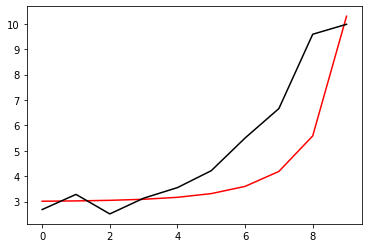

9246 0.1287754008874052 -0.9971065498604506
[2.68769636 3.28232521 2.51457096 3.13154662 3.54930118 4.21561635
 5.50461161 6.66871093 9.5990771  9.98162077]


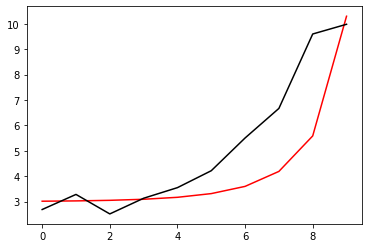

9447 0.005634682242203148 -0.9974987198173587
[2.68898905 3.28097302 2.51422989 3.12935093 3.54730094 4.21439334
 5.50506659 6.67342466 9.60879352 9.98206422]


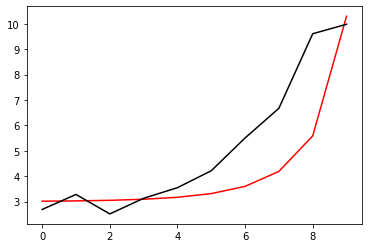

9648 0.010145725117948319 -0.9978657689365249
[2.69030708 3.27960533 2.51387726 3.12713079 3.54526992 4.21312549
 5.50544308 6.67799342 9.61831499 9.98250379]


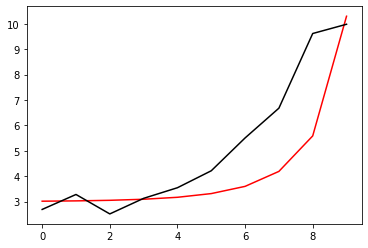

9849 0.006701498812494584 -0.998194786356231
[2.69167077 3.27824676 2.51353579 3.12490963 3.54323183 4.21183899
 5.50577427 6.68246495 9.62769966 9.98294066]


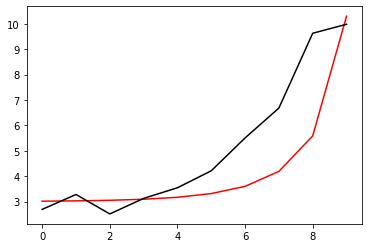

In [165]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.0054184567369400475 -0.9985374563877761
[2.68972306 3.27244396 2.51106042 3.11959988 3.53925652 4.21070149
 5.51156526 6.70650785 9.65224255 9.98407701]


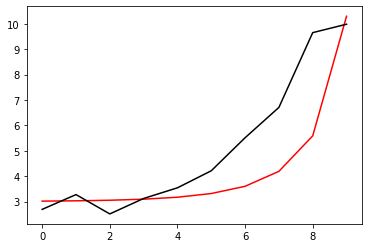

402 1.0072070603924244 -0.9990663816193547
[2.69258004 3.27327525 2.5128229  3.119689   3.53943937 4.21149809
 5.51386089 6.71323845 9.66368573 9.98460549]


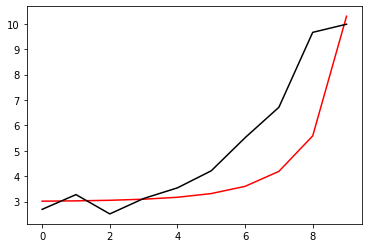

603 0.003946663565410303 -0.9992400576926738
[2.69451485 3.27288977 2.51341016 3.11850891 3.53839169 4.21112761
 5.51504131 6.71866303 9.6740019  9.98507754]


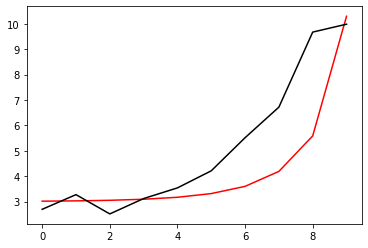

804 0.007252937522806411 -0.9993298764383791
[2.69626482 3.27217002 2.51367664 3.11697021 3.53698935 4.21039569
 5.51580691 6.7234711  9.68358145 9.98551071]


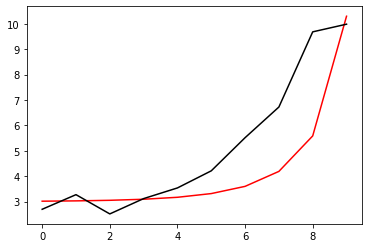

1005 0.005931281717407141 -0.9993894226441211
[2.69789863 3.27123503 2.51373334 3.11519313 3.53534515 4.20941148
 5.5162828  6.72787831 9.69267906 9.9859216 ]


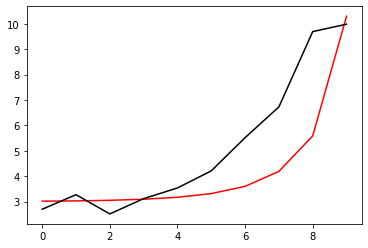

1206 0.006191813227954005 -0.9994400782833468
[2.6994911  3.27018725 2.51367952 3.11328294 3.53356372 4.20828309
 5.51659248 6.73205708 9.70149952 9.98632364]


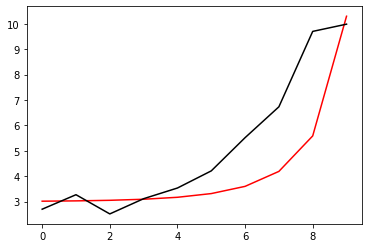

1407 1.0059226522835818 -0.9994873962748243
[2.70108684 3.2690896  2.5135751  3.11130456 3.53170989 4.20707746
 5.51681116 6.7361069  9.71016062 9.98672233]


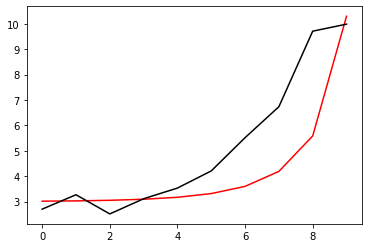

1608 0.004590143495208527 -0.9995289856836811
[2.70270778 3.26797803 2.51345404 3.10929649 3.5298222  4.20583389
 5.51698177 6.74008176 9.71872415 9.98711789]


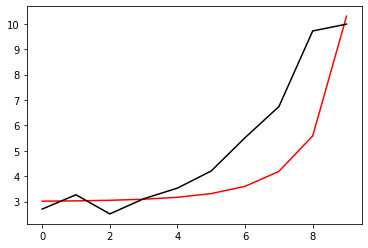

1809 0.005210452611730917 -0.9995658991126275
[2.70435312 3.26686289 2.51332592 3.1072722  3.52791429 4.20456617
 5.51711928 6.74400143 9.72721243 9.9875092 ]


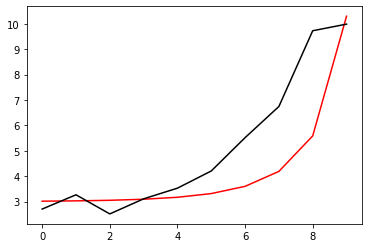

2010 1.005204450727208 -0.999598489630008
[2.70601705 3.26574762 2.5131946  3.10523903 3.52599392 4.20328203
 5.51723147 6.74787522 9.73563398 9.98789581]


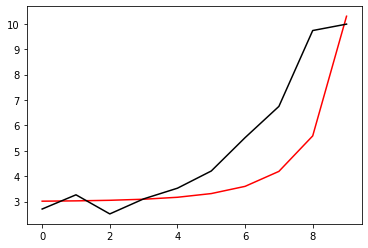

2211 0.004814962720814799 -0.9996262994844038
[2.70769398 3.26463379 2.51306273 3.10320222 3.52406679 4.20198697
 5.51732315 6.75170781 9.74399115 9.98827802]


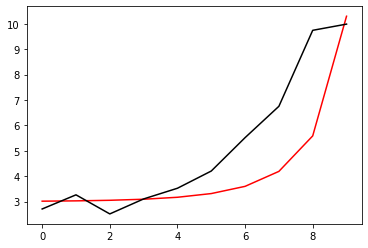

2412 0.006675460454491768 -0.9996532261422529
[2.70937411 3.26351678 2.51292675 3.10115995 3.5221314  4.20067921
 5.51739192 6.75549651 9.7522793  9.98865649]


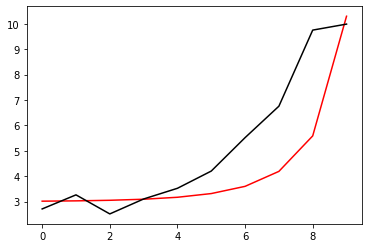

2613 0.004623483723669391 -0.9996752291309597
[2.7110621  3.26240512 2.51279646 3.09912327 3.52019908 4.19936983
 5.51744798 6.75925065 9.76050499 9.98903179]


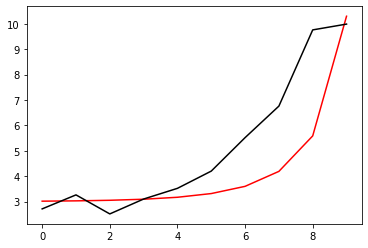

2814 0.00529637048341264 -0.9996957495153994
[2.71275167 3.26129462 2.51266835 3.09708905 3.51826669 4.1980554
 5.51748738 6.76296628 9.76866329 9.98940437]


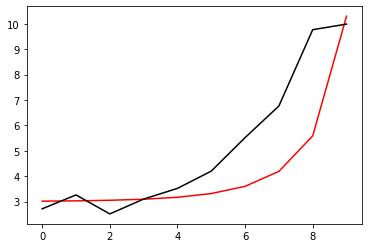

3015 0.00571640618718541 -0.9997168316864093
[2.71444022 3.26018401 2.51254172 3.09505672 3.51633368 4.19673527
 5.51750933 6.76664305 9.77675363 9.98977442]


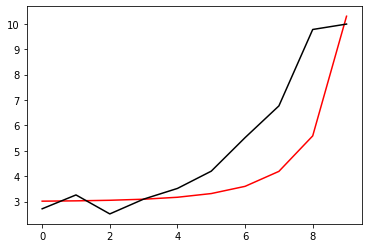

3216 0.005616330902936272 -0.9997382743876924
[2.71612798 3.25907422 2.51241788 3.09302749 3.51440125 4.19541057
 5.51751493 6.77028267 9.7847778  9.99014198]


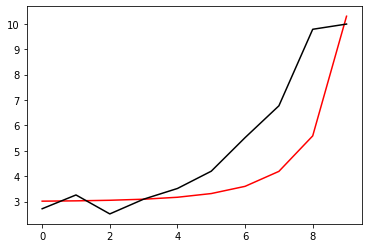

3417 0.003806563018116668 -0.9997572273054801
[2.71781926 3.25796999 2.512302   3.0910064  3.51247449 4.19408651
 5.51750959 6.77389138 9.79274247 9.990507  ]


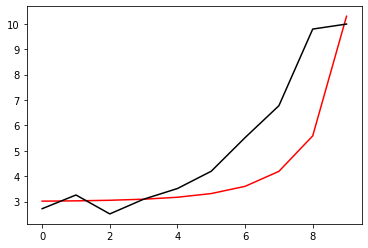

3618 0.02021743480715856 -0.9996872305944189
[2.71948243 3.256843   2.51216921 3.08897192 3.51053632 4.19275234
 5.51749258 6.77748441 9.80068422 9.99086943]


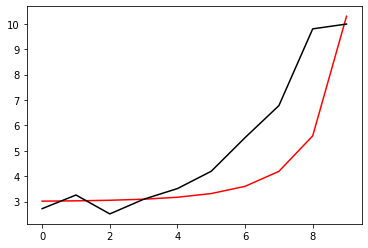

3819 0.9817753577007605 -0.9996747339262293
[2.7210883  3.25566052 2.51198416 3.08688658 3.50854848 4.19137053
 5.51742931 6.78103344 9.80858359 9.99122956]


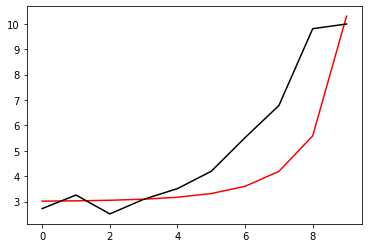

4020 0.00544942801278905 -0.9996706649604739
[2.72269984 3.25448519 2.5118084  3.08480927 3.50656524 4.18998728
 5.5173519  6.78454809 9.81641832 9.99158779]


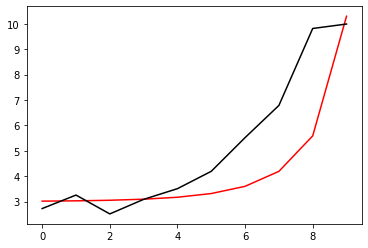

4221 0.004824604203636382 -0.9996725204147262
[2.7243181  3.25331803 2.51164302 3.08274098 3.50458774 4.18860405
 5.51726248 6.78803185 9.82419342 9.99194427]


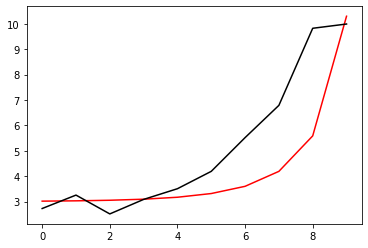

4422 0.0040876731251796375 -0.9996780800229872
[2.72594424 3.25216025 2.51148931 3.08068296 3.50261737 4.18722255
 5.5171634  6.79148828 9.8319138  9.99229898]


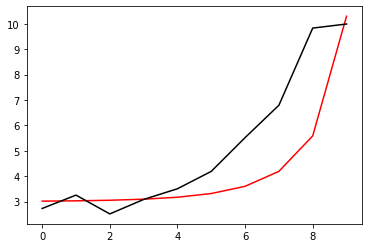

4623 0.003404987391383086 -0.9996854716805552
[2.72757906 3.25101272 2.51134816 3.07863613 3.50065519 4.18584417
 5.51705666 6.79492051 9.83958391 9.99265175]


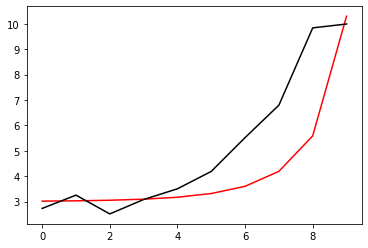

4824 1.003671885043251 -0.9996949863875526
[2.72922049 3.24987343 2.51121754 3.07659851 3.49869939 4.18446747
 5.51694153 6.79832908 9.84720587 9.99300238]


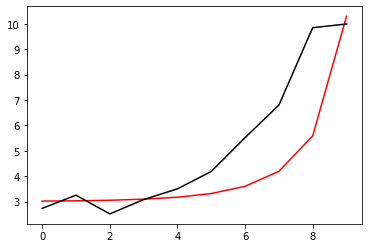

5025 1.004547563412186 -0.9997076354877772
[2.73086505 3.24873894 2.51109388 3.07456657 3.49674655 4.18308937
 5.51681565 6.80171291 9.85478031 9.99335068]


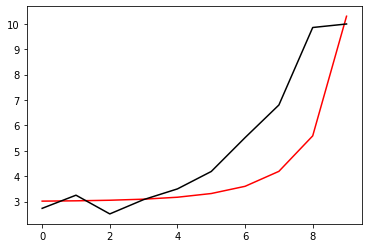

5226 2.0045610672974736 -0.9997163685971882
[2.73249971 3.24759714 2.51096568 3.07252963 3.49478684 4.18170122
 5.51667221 6.80506802 9.86230707 9.99369653]


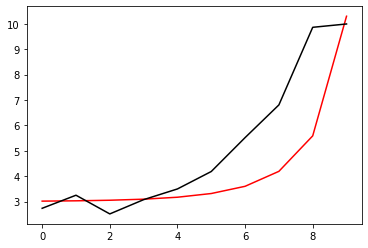

5427 0.004561355223675557 -0.9997284114800318
[2.73413735 3.24646031 2.51084435 3.07049855 3.49283049 4.18031259
 5.51651992 6.80840189 9.86979186 9.99403987]


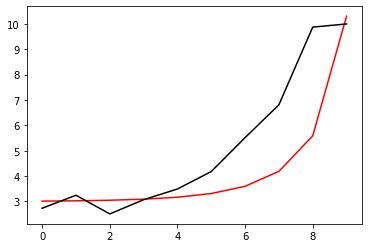

5628 0.0034189215749784725 -0.9997410840936238
[2.73578059 3.24533137 2.51073279 3.06847649 3.49088082 4.17892701
 5.51636271 6.81171896 9.87723975 9.99438076]


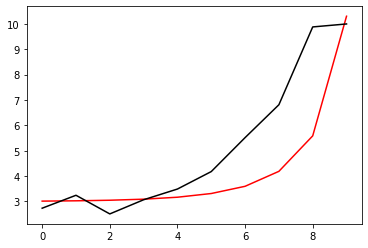

5829 0.2288953682728215 -0.9989376911330513
[2.73813321 3.24490023 2.51130648 3.06712917 3.48959695 4.17820286
 5.51686645 6.81570123 9.88535453 9.99471944]


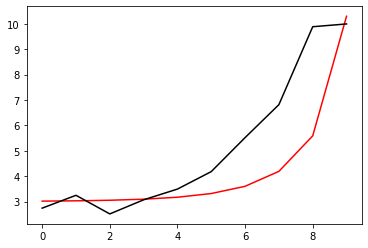

6030 0.005013726311649487 -0.9982158127913724
[2.74042167 3.24440914 2.5118231  3.06572549 3.48825524 4.1774178
 5.51730151 6.81960276 9.89336851 9.99506269]


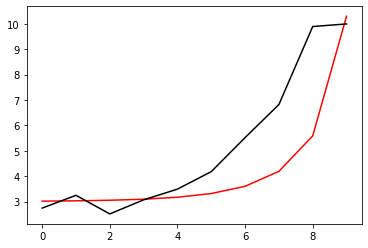

6231 0.0065703587039256245 -0.9975693547678344
[2.74264876 3.24386109 2.51228532 3.06426833 3.48685869 4.17657512
 5.51767178 6.82342836 9.90128784 9.99541479]


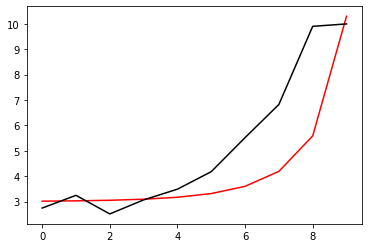

6432 0.016116110051355267 -0.9970026444117863
[2.74480349 3.24324499 2.51268162 3.06274627 3.48539595 4.17566391
 5.51796736 6.82716981 9.90910695 9.995777  ]


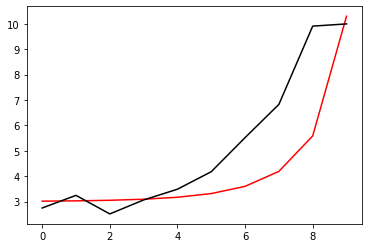

6633 0.022411859872826234 -0.9965172423288372
[2.74687716 3.24255239 2.51300324 3.06115084 3.48385875 4.17467637
 5.51818138 6.83082174 9.91682277 9.99614745]


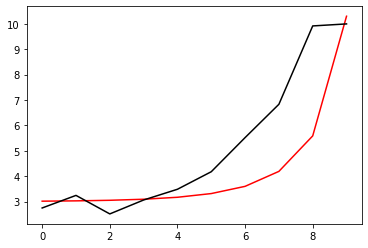

6834 0.06317572006400689 -0.9961926713061608
[2.74888484 3.24178845 2.51324648 3.05947126 3.48222979 4.17358893
 5.51828352 6.83434584 9.92438812 9.99652188]


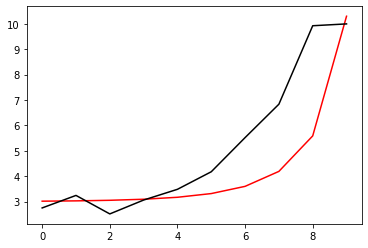

7035 0.995109788359971 -0.9958732212125887
[2.75087013 3.24100845 2.51347574 3.05778005 3.48058849 4.17248752
 5.51836665 6.83784258 9.93191148 9.99689424]


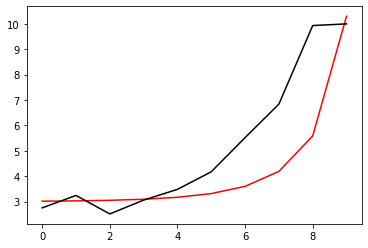

7236 0.03575805374711592 -0.9956464444704797
[2.75280406 3.24017828 2.51365216 3.05603477 3.47888906 4.17132328
 5.51837879 6.84125658 9.93933435 9.99725911]


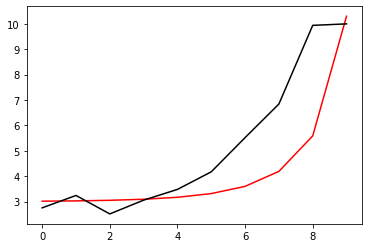

7437 0.03101803215672305 -0.9954799170997334
[2.75464001 3.23925681 2.51373892 3.05420292 3.47710305 4.17007234
 5.51830216 6.84457845 9.94665844 9.99761217]


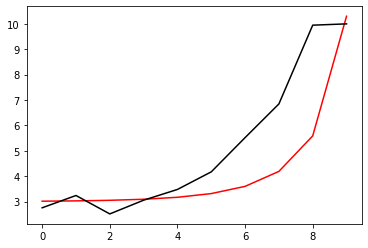

7638 0.01920361014828408 -0.9953533241281146
[2.75642465 3.23829052 2.51378178 3.05233001 3.47527532 4.16877849
 5.51817867 6.84784671 9.95391734 9.99795101]


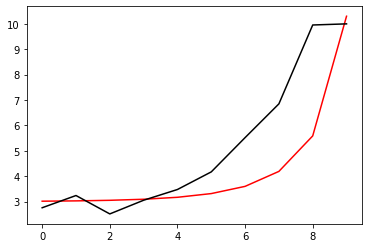

7839 0.016983408947077477 -0.9952665756085665
[2.75816568 3.23728802 2.51378971 3.05042581 3.47341607 4.16745232
 5.51801918 6.85107214 9.96112154 9.99827569]


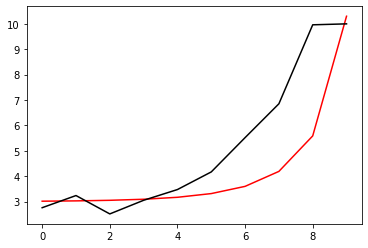

8040 0.019593492471634014 -0.9952088856291983
[2.75985393 3.23624019 2.51375307 3.04848062 3.47151543 4.16608392
 5.51781412 6.85424599 9.968264   9.99858864]


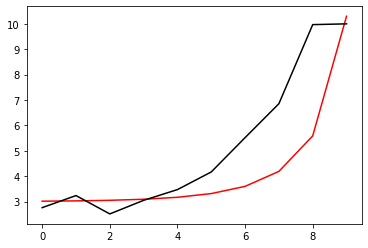

8241 0.08207037788459749 -0.9954756481505129
[2.76145355 3.23508632 2.51358969 3.04639427 3.46945685 4.16454062
 5.51741294 6.85719635 9.97514887 9.99889381]


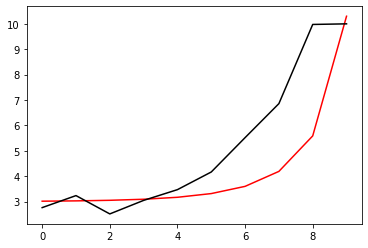

8442 0.03083627388481263 -0.995784632515905
[2.7629497  3.233838   2.51333327 3.04422001 3.46731138 4.16291171
 5.51692626 6.86006048 9.98194525 9.99919394]


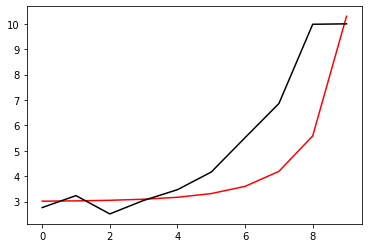

8643 0.025922467883118312 -0.996141130329772
[2.76435033 3.23250476 2.51299445 3.0419699  3.4650922  4.1612113
 5.51636891 6.86285339 9.98866779 9.99949168]


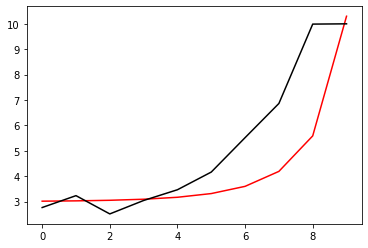

8844 0.01761038391248931 -0.9965272700856403
[2.76573883 3.2311658  2.51264832 3.03971571 3.46286755 4.1595036
 5.51579982 6.86562634 9.99535755 9.99978919]


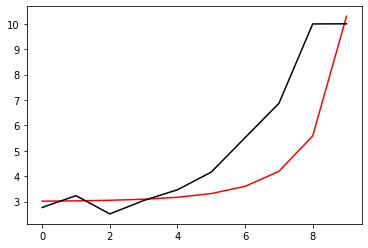

9045 0.0068157141274385324 -0.9968848161380142
[ 2.76712973  3.22984061  2.51231814  3.0374842   3.46066705  4.15782091
  5.51525399  6.86841718 10.00205543 10.00008817]


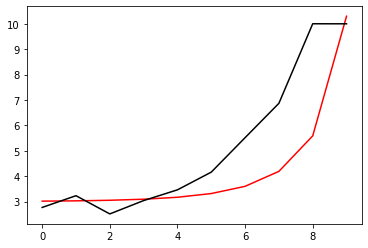

9246 0.06631276613399195 -0.9973134892666926
[ 2.76836794  3.22837222  2.51184675  3.03512153  3.45834521  4.15603465
  5.5146343   6.87118082 10.00878905 10.00038993]


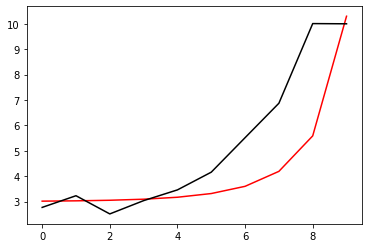

9447 0.004097663325774466 -0.9977044510813353
[ 2.76963517  3.22694438  2.51141742  3.03280732  3.4560721   4.15429577
  5.51405637  6.87397432 10.0155339  10.00069544]


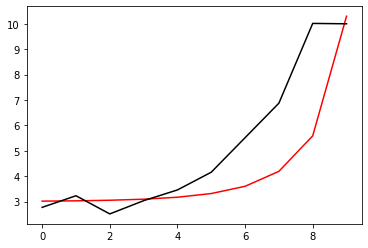

9648 0.007070870626152091 -0.9980688612258737
[ 2.7709128   3.22553823  2.51101088  3.03052229  3.45382849  4.15258536
  5.51350215  6.87678115 10.02227599 10.00100494]


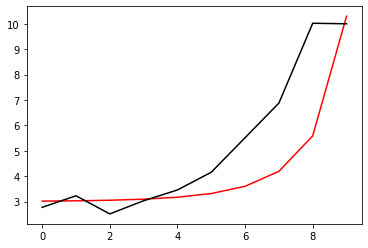

9849 0.004796357912159559 -0.9984009156315204
[ 2.77221032  3.22416322  2.51063623  3.02827553  3.4516233   4.15091222
  5.51298026  6.87960962 10.02902329 10.00131785]


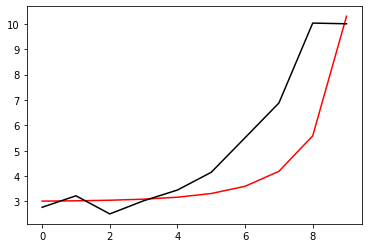

In [166]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 0.004232030041671473 -0.9991791513437049
[ 2.77302973  3.2215852   2.51190687  3.02708215  3.45198631  4.15418204
  5.52215345  6.90487158 10.05467219 10.00250585]


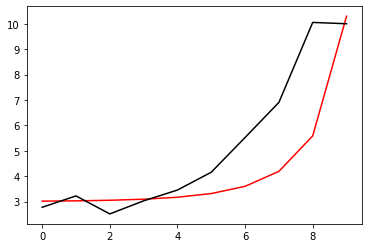

402 1.0061147988212866 -0.9990086685139592
[ 2.7740721   3.22048966  2.51165501  3.02515424  3.45008133  4.15282937
  5.52211651  6.90878896 10.06344006 10.00291646]


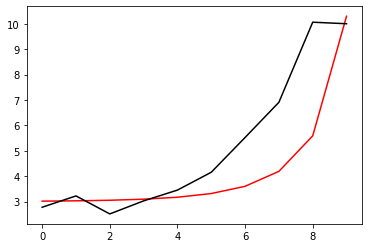

603 0.0033423337500061256 -0.9990192939338498
[ 2.77558349  3.21977434  2.51181817  3.02366351  3.44863453  4.15191202
  5.52237954  6.91250067 10.07129564 10.003274  ]


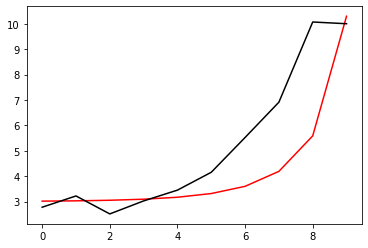

804 0.006383551585527317 -0.9990404106667314
[ 2.7770833   3.21898852  2.51192367  3.0221074   3.44712338  4.15091873
  5.52252227  6.91595507 10.07871603 10.003608  ]


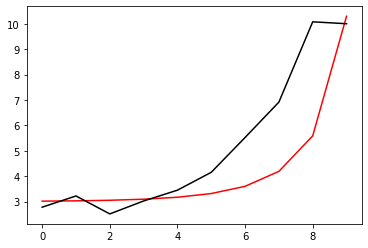

1005 0.005230623232094013 -0.9990621486990549
[ 2.77855461  3.21813575  2.51197167  3.02048467  3.44554511  4.14985239
  5.52257015  6.91925199 10.08589456 10.00393146]


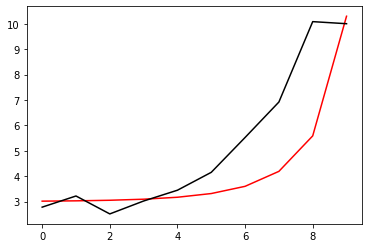

1206 0.0056834017769765086 -0.9990851971598121
[ 2.78000825  3.21723832  2.51198196  3.01881602  3.44391987  4.14873544
  5.52255434  6.92245008 10.09292412 10.00425164]


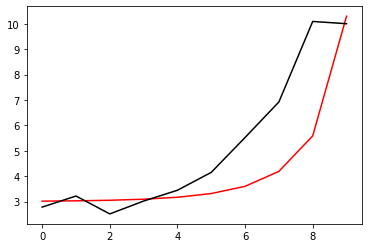

1407 1.0054375691372257 -0.9991091707378127
[ 2.78145285  3.21631228  2.51196878  3.01711706  3.44226307  4.14758441
  5.52249567  6.92558311 10.09985491 10.00457089]


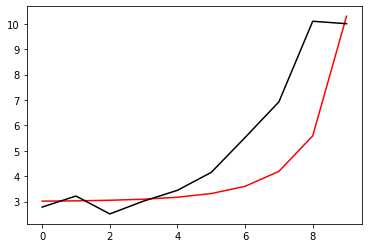

1608 0.003912389712376031 -0.999130473043267
[ 2.78289749  3.21537207  2.51194532  3.01540241  3.44058929  4.14641455
  5.52241172  6.92867549 10.1067202  10.00488844]


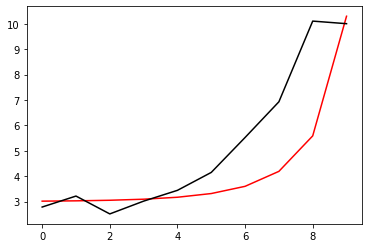

1809 0.0045538946882511845 -0.9991507788447076
[ 2.78434128  3.21442068  2.51191347  3.01367521  3.43890173  4.14522952
  5.52230776  6.9317369  10.11353577 10.00520315]


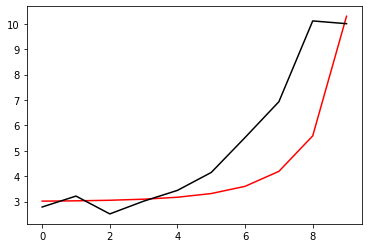

2010 1.0047703672299881 -0.9991714580474127
[ 2.78578334  3.21346036  2.51187477  3.01193823  3.43720332  4.14403267
  5.52218836  6.93477479 10.12031315 10.00551468]


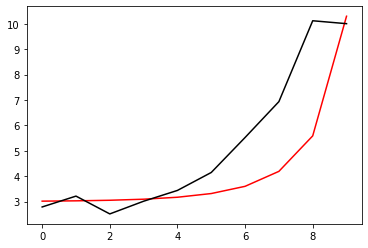

2211 0.004293150126539427 -0.9991915955352809
[ 2.78722482  3.21249478  2.51183225  3.01019555  3.43549824  4.14282846
  5.52205868  6.93779606 10.12706185 10.0058235 ]


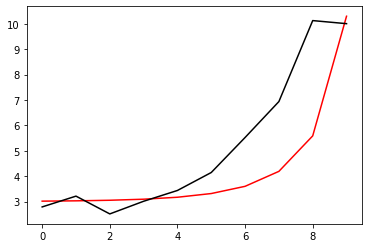

2412 0.00622043379740576 -0.9992146766865316
[ 2.78866     3.21152011  2.51178146  3.00844358  3.433783    4.14161364
  5.52191621  6.94079979 10.13378349 10.00613042]


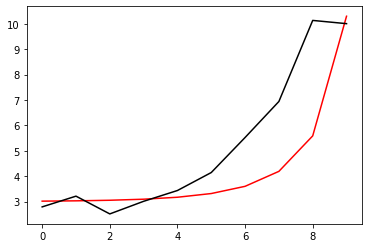

2613 0.004049742130063401 -0.9992354052066115
[ 2.79009705  3.21054646  2.51173224  3.00669314  3.4320686   4.14039933
  5.5217723   6.9437977  10.1404904  10.00643621]


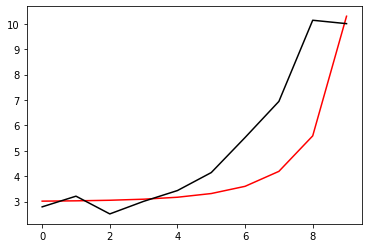

2814 0.004733259832118615 -0.999256347151268
[ 2.79153108  3.20957022  2.51168046  3.00494072  3.43035152  4.13918209
  5.5216238   6.94678728 10.14718139 10.00674147]


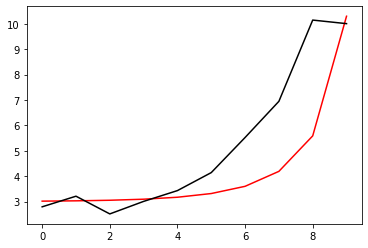

3015 0.0052736328694082055 -0.9992790157981576
[ 2.79295976  3.20859022  2.51162463  3.00318546  3.42863104  4.13796133
  5.52147044  6.94976882 10.15385776 10.00704658]


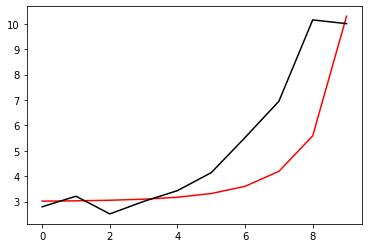

3216 0.005139458566543213 -0.9993027337536498
[ 2.79438379  3.20760823  2.51156623  3.00142944  3.42690928  4.13673923
  5.52131452  6.95274475 10.16052242 10.00735169]


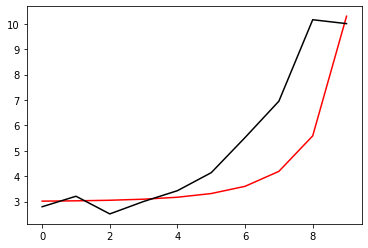

3417 0.0032155586597669155 -0.9993238984391036
[ 2.79580844  3.20663055  2.51151142  2.99967941  3.42519312  4.13552271
  5.521163    6.95572195 10.16718225 10.0076568 ]


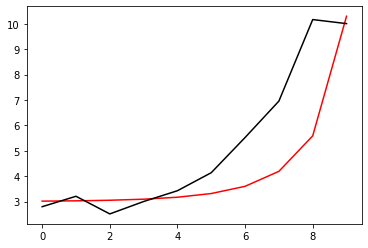

3618 0.010343881248410071 -0.9993151708765584
[ 2.79721891  3.20564427  2.51144822  2.99792513  3.42347401  4.13430558
  5.52101341  6.95870371 10.17384879 10.00796187]


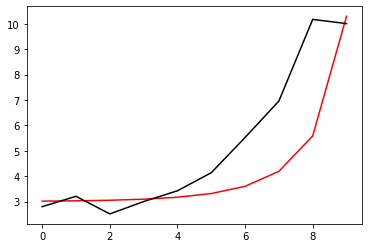

3819 0.969290386966493 -0.999375345787191
[ 2.79853603  3.20456995  2.51129726  2.99608957  3.42167953  4.1330244
  5.52081876  6.96167014 10.18054038 10.00826692]


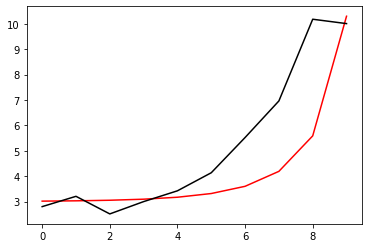

4020 0.004680043447932707 -0.9994344367883268
[ 2.79985644  3.2035043   2.51115329  2.9942641   3.41989418  4.13175121
  5.52062913  6.96463542 10.1872212  10.00857225]


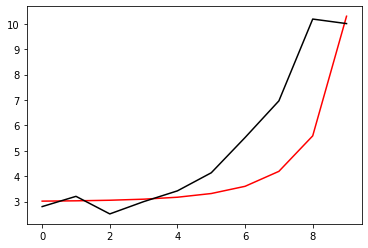

4221 0.004018877371295866 -0.9994908766263637
[ 2.80118149  3.20244923  2.5110181   2.99245091  3.41812024  4.13048844
  5.52044715  6.96760238 10.19389459 10.00887796]


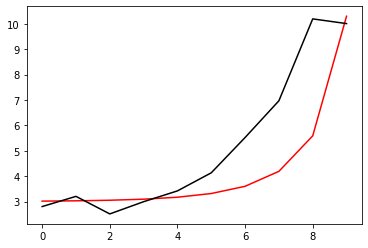

4422 0.0034089160708397244 -0.9995436448067287
[ 2.80251204  3.20140609  2.51089298  2.99065163  3.41635947  4.12923797
  5.52027488  6.97057329 10.20056321 10.00918403]


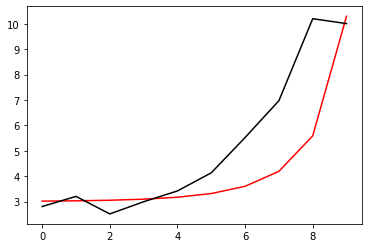

4623 0.0028798915687525666 -0.9995920036739283
[ 2.8038485   3.2003757   2.51077867  2.98886734  3.41461306  4.12800107
  5.5201138   6.97354981 10.2072291  10.00949033]


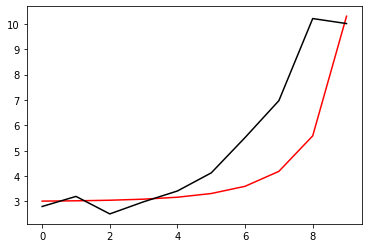

4824 1.0031013031582725 -0.9996369422558036
[ 2.80518884  3.19935637  2.51067339  2.9870965   3.41287958  4.12677651
  5.51996292  6.97653133 10.2138924  10.00979666]


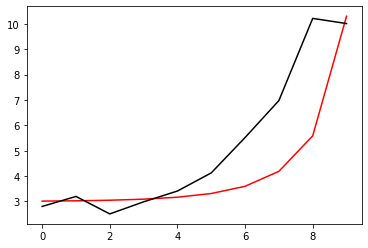

5025 1.0036687522530212 -0.9996796740522814
[ 2.8065303   3.19834558  2.5105745   2.98533667  3.41115667  4.12556204
  5.5198203   6.97951633 10.22055232 10.01010281]


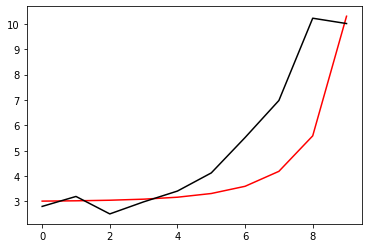

5226 2.0037525595530785 -0.9997161025973149
[ 2.80786354  3.19733474  2.51047381  2.98358032  3.40943738  4.12435143
  5.51968074  6.98250118 10.22720749 10.01040861]


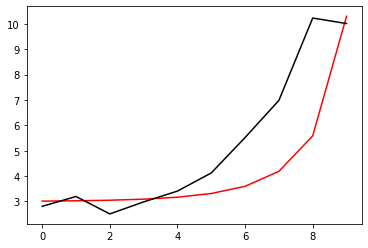

5427 0.003660545315618435 -0.9997511166786169
[ 2.80919728  3.19633226  2.51037916  2.98183499  3.4077288   4.1231512
  5.51955001  6.9854904  10.23386088 10.01071392]


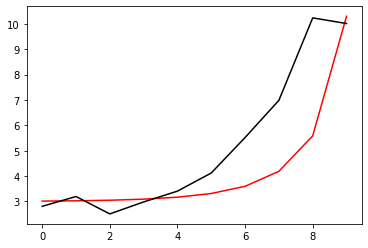

5628 0.0028902619801638046 -0.9997833315575977
[ 2.81053318  3.19534003  2.51029244  2.98010278  3.40603309  4.12196358
  5.51943039  6.9884863  10.24051485 10.01101869]


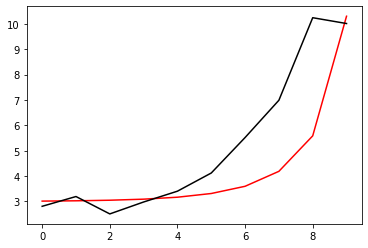

5829 0.21922054470325955 -0.9989992161942541
[ 2.81258645  3.19505875  2.51089972  2.97905927  3.40501856  4.12145511
  5.51999475  6.99217733 10.24788107 10.01132299]


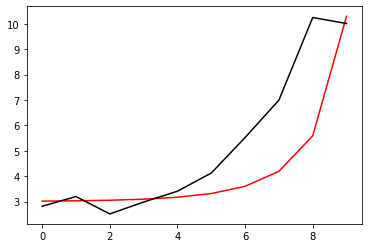

6030 0.003993481998607633 -0.9982947516164473
[ 2.81456739  3.19471498  2.51144348  2.97795876  3.40394766  4.12089039
  5.52050115  6.99580501 10.25517668 10.01163353]


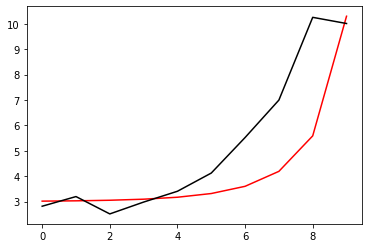

6231 0.004991127974172651 -0.997663234125996
[ 2.81648064  3.19431331  2.51192816  2.97680567  3.40282481  4.12027394
  5.5209544   6.99937465 10.26240775 10.01195443]


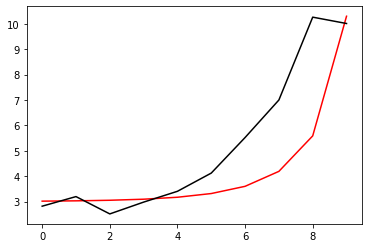

6432 0.011297781125124895 -0.9971050790196104
[ 2.81832109  3.19384845  2.51234817  2.9755944   3.40164444  4.11960044
  5.52134976  7.00288262 10.26957239 10.01228675]


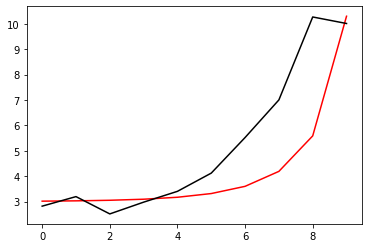

6633 0.015747896513537495 -0.9966194599423119
[ 2.82008567  3.19331723  2.51270019  2.97432162  3.40040327  4.11886681
  5.52168468  7.00632724 10.27667031 10.01262851]


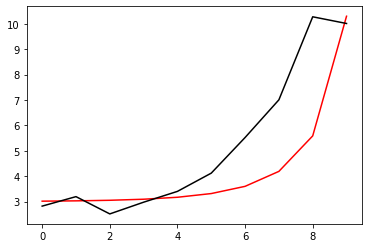

6834 0.03749535663927997 -0.9962345232162487
[ 2.82175558  3.19269818  2.51296039  2.97296167  3.39907418  4.11804486
  5.52193031  7.0096796  10.28367331 10.01297546]


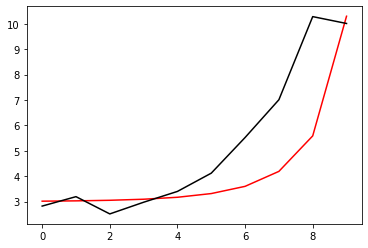

7035 0.9922155879826239 -0.9958637495217056
[ 2.82340703  3.19206997  2.51320919  2.9715964   3.39773988  4.11721758
  5.52216922  7.01302062 10.29065918 10.01332185]


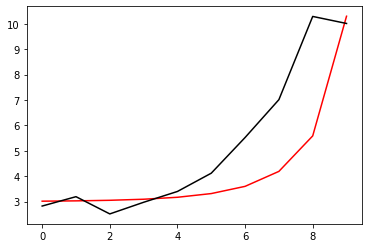

7236 0.02520776715295915 -0.9955658817308646
[ 2.8250004   3.19139093  2.5134032   2.9701811   3.39635462  4.11633852
  5.52235459  7.0163036  10.29758214 10.01366247]


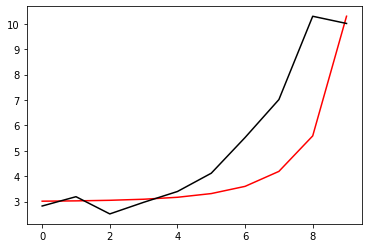

7437 0.02539604542859209 -0.9953296252347646
[ 2.82651335  3.19064077  2.5135239   2.96869892  3.39490325  4.11539447
  5.52247592  7.01952198 10.30444088 10.01399322]


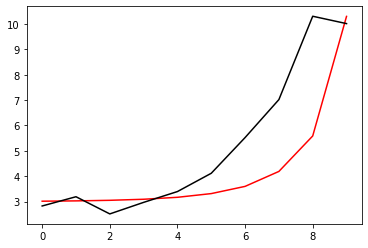

7638 0.015797410036716978 -0.9951360026910275
[ 2.82798045  3.18985393  2.51360546  2.96718382  3.3934193   4.11441827
  5.52256476  7.02270502 10.31126132 10.01431182]


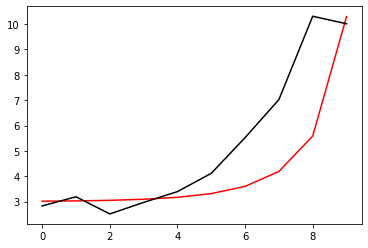

7839 0.01671254548380161 -0.9949898319338543
[ 2.82940363  3.18903274  2.51365055  2.96563887  3.39190617  4.11341357
  5.52262497  7.02585669 10.31804739 10.01461831]


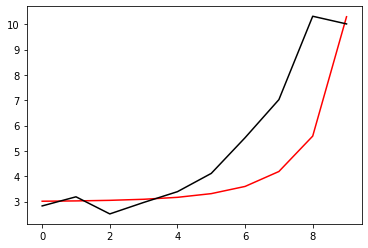

8040 0.017937413063742476 -0.9948791699247895
[ 2.83077892  3.18817309  2.51365478  2.96405943  3.39035903  4.11237547
  5.52265184  7.02897285 10.3247961  10.01491485]


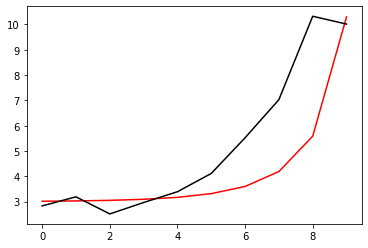

8241 0.08694660981479692 -0.9951085543910374
[ 2.83206813  3.18721117  2.51353266  2.96234158  3.38865743  4.1111673
  5.52249054  7.03187665 10.33130508 10.01520502]


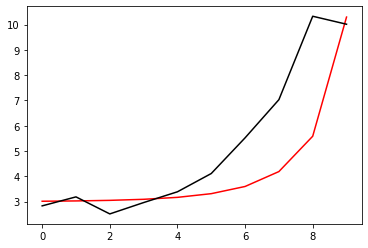

8442 0.03155017584017141 -0.9953867154532463
[ 2.83325136  3.18615467  2.51331529  2.96053664  3.3868712   4.10987775
  5.52225195  7.03470724 10.33774787 10.01549111]


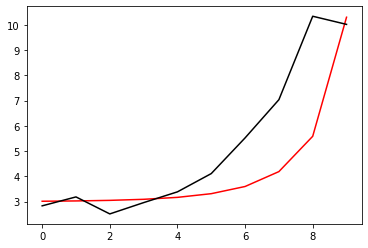

8643 0.03005906449377301 -0.995729151020343
[ 2.83432082  3.18499677  2.51299683  2.95863979  3.3849965   4.10850389
  5.52193404  7.03746341 10.34412392 10.0157754 ]


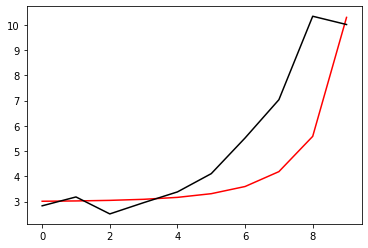

8844 0.018651802791560014 -0.9961058877953455
[ 2.83537584  3.18383226  2.51266791  2.956738    3.38311655  4.10712468
  5.52161004  7.04021013 10.35048707 10.01605967]


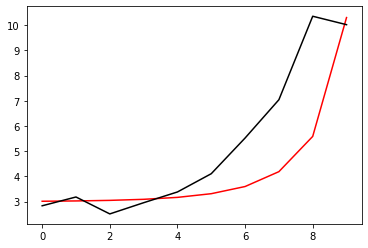

9045 0.006400066508214678 -0.9964526267136609
[ 2.8364365   3.18268599  2.51235728  2.95486329  3.38126616  4.10577743
  5.52131986  7.04299007 10.35688287 10.0163454 ]


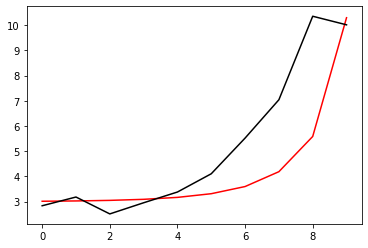

9246 0.05123828107218749 -0.9968642419183331
[ 2.8373627   3.18141604  2.51192252  2.95287484  3.37930941  4.10433663
  5.52095771  7.04573089 10.36328654 10.01663393]


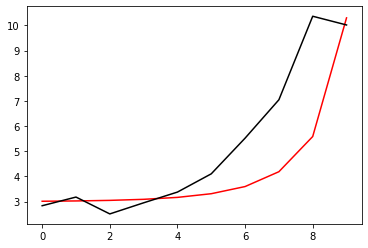

9447 0.003949822328830899 -0.9972400289151585
[ 2.8383175   3.18018701  2.5115283   2.95093525  3.37740315  4.10294729
  5.52064639  7.04851785 10.36973013 10.01692597]


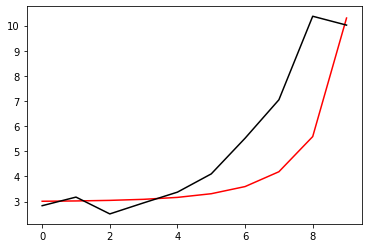

9648 0.007368046502817057 -0.997591989478364
[ 2.83927956  3.17897721  2.51115259  2.94902237  3.37552527  4.10158759
  5.5203648   7.05133128 10.37619617 10.01722179]


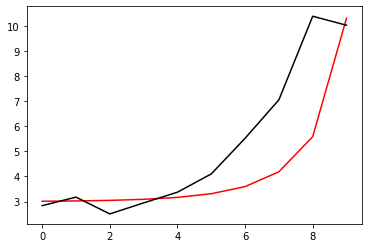

9849 0.004464403442833446 -0.9979117671706891
[ 2.84026114  3.17779871  2.51080725  2.94714787  3.37368724  4.10026873
  5.5201238   7.05418146 10.38269423 10.01752111]


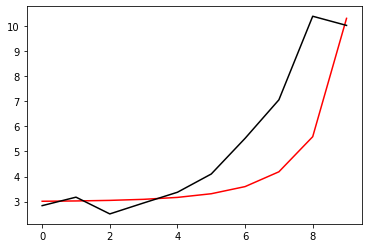

In [167]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%set)
    if i%201==0: print(i, Error_func(h, m2_2, Positive[i%set], Negative[i%set]).numpy(), m2_2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

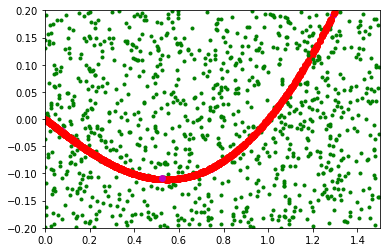

In [125]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()